In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GRU, Bidirectional, TimeDistributed, BatchNormalization

from numpy import array
from keras.models import load_model
from keras.utils import np_utils
import os

import numpy as np
import pandas as pd
from tqdm import tqdm

from trackml.dataset import load_event, load_dataset
from trackml.score import score_event

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def append_to_csv(batch, csv_file):
    props = dict(encoding='utf-8', index=False)
    if not os.path.exists(csv_file):
        batch.to_csv(csv_file, **props)
    else:
        batch.to_csv(csv_file, mode='a', header=False, **props)

def delete_file_if_exists(filename):
    if os.path.exists(filename):
        os.remove(filename)

In [3]:
# https://stackoverflow.com/questions/8487893/generate-all-the-points-on-the-circumference-of-a-circle
def PointsInCircum(r,n=100):
    return [(math.cos(2.*np.pi/float(n)*float(x))*r*np.random.random(),
             math.sin(2*np.pi/float(n)*float(x))*r*np.random.random()) for x in range(n)]

In [3]:
seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
seq = array(seq)

In [4]:
X, y = seq[:, 0], seq[:, 1]

In [5]:
X

array([0. , 0.1, 0.2, 0.3, 0.4])

In [6]:
y

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [7]:
X = X.reshape((len(X), 1, 1))

In [8]:
# define model
model = Sequential()
model.add(LSTM(10, input_shape=(1,1)))
model.add(Dense(1, activation='linear'))

In [9]:
# compile model
model.compile(loss='mse', optimizer='adam')

In [10]:
model.fit(X, y, epochs=1000, shuffle=False, verbose=0)

In [11]:
# save model to single file
model.save('../cache/dummy_test_lstm_model.h5')

In [12]:
yhat = model.predict(X, verbose=0)
print(yhat)

[[0.10637811]
 [0.19722797]
 [0.2947036 ]
 [0.39764166]
 [0.5046015 ]]


In [13]:
model = load_model('../cache/dummy_test_lstm_model.h5')

In [14]:
yhat1 = model.predict(X, verbose=0)
print(yhat1)

[[0.10637811]
 [0.19722797]
 [0.2947036 ]
 [0.39764166]
 [0.5046015 ]]


In [15]:
X1 = array([0.2, 0.3, 0.4, 0.5, 0.6])

In [16]:
yhat1 = model.predict(X1.reshape(len(X1),1,1), verbose=0)
print(yhat1)

[[0.2947036 ]
 [0.39764166]
 [0.5046015 ]
 [0.6140177 ]
 [0.7243818 ]]


In [17]:
X1 = array([0.9, 1.0, 1.1, 1.2, 1.3])

In [18]:
yhat1 = model.predict(X1.reshape(len(X1),1,1), verbose=0)
print(yhat1)

[[1.0468409]
 [1.1539901]
 [1.259333 ]
 [1.3625385]
 [1.4633688]]


In [19]:
# define model
model = Sequential()
model.add(LSTM(100, input_shape=(1,1)))
model.add(Dense(1, activation='linear'))

In [20]:
# compile model
model.compile(loss='mse', optimizer='adam')

In [21]:
model.fit(X, y, epochs=1000, shuffle=False, verbose=0)

In [22]:
y

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [23]:
yhat = model.predict(X, verbose=0)
print(yhat)

[[0.10250476]
 [0.1987713 ]
 [0.2975856 ]
 [0.39881948]
 [0.50233734]]


In [24]:
# define model
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=(1,1)))
model.add(LSTM(10))
model.add(Dense(1, activation='linear'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 10)             480       
_________________________________________________________________
lstm_4 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [26]:
# compile model
model.compile(loss='mse', optimizer='adam')

In [27]:
model.fit(X, y, epochs=1000, shuffle=False, verbose=0)

In [28]:
model.predict(X)

array([[0.11046237],
       [0.19574162],
       [0.2911232 ],
       [0.39563787],
       [0.5078236 ]], dtype=float32)

In [29]:
X1 = X1.reshape(len(X1),1,1)

In [30]:
X1

array([[[0.9]],

       [[1. ]],

       [[1.1]],

       [[1.2]],

       [[1.3]]])

In [31]:
model.predict(X1)

array([[1.1174215],
       [1.2368689],
       [1.3526486],
       [1.4641562],
       [1.5710382]], dtype=float32)

In [34]:
path_to_train = "../data/train_100_events"
# event_prefix = "event000001000"

if 0:
    file_hits = '../cache/train_100_hits.csv'
    file_truth = '../cache/train_100_truth.csv'

    delete_file_if_exists(file_hits)
    delete_file_if_exists(file_truth)


    for event_id, hits, cells, particles, truth in tqdm(load_dataset(path_to_train)):

            truth1 = pd.merge(truth, particles, how='left', on='particle_id')
            hits1 = pd.merge(hits, truth1, how='left', on='hit_id')

            hits2 = hits1.dropna()
            truth2 = truth1.dropna()

            hits3 = hits2[hits2.nhits > 3]
            truth3 = truth2[truth2.nhits > 3]

            hits3['event_id'] = event_id
            truth3['event_id'] = event_id

            append_to_csv(hits3, file_hits)
            append_to_csv(truth3, file_truth)

100it [06:09,  3.69s/it]


In [3]:
hits = pd.read_csv('../cache/train_100_hits.csv')

In [4]:
hits.shape

(9009603, 24)

In [37]:
hits.head(50)

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,weight,vx,vy,vz,px,py,pz,q,nhits,event_id
0,2,-55.3361,0.635342,-1502.5,7,2,1,22525763437723648,-55.3385,0.630805,...,0.000010,-0.015802,0.006381,1.162790,-0.569670,-0.011187,-15.49600,1.0,10.0,1000
1,4,-96.1091,-8.241030,-1502.5,7,2,1,297237712845406208,-96.1229,-8.230360,...,0.000008,-0.000486,-0.015051,5.758650,-0.240629,0.012071,-3.70766,-1.0,11.0,1000
2,5,-62.6736,-9.371200,-1502.5,7,2,1,418835796137607168,-62.6594,-9.375040,...,0.000009,0.018365,-0.016865,4.192680,-0.268943,-0.058487,-6.58619,1.0,10.0,1000
3,6,-57.0687,-8.177770,-1502.5,7,2,1,108087696726949888,-57.0856,-8.189710,...,0.000008,0.010383,-0.012398,3.928940,-0.392669,-0.075470,-10.47140,1.0,11.0,1000
4,7,-73.8723,-2.578900,-1502.5,7,2,1,968286151951515648,-73.8608,-2.575860,...,0.000007,-0.004178,0.004751,-5.128840,-0.453130,0.008006,-9.13374,-1.0,13.0,1000
5,8,-63.8535,-10.868400,-1502.5,7,2,1,954766419537428480,-63.8512,-10.875400,...,0.000011,0.014798,-0.019703,-11.761500,-0.662359,-0.132371,-15.54390,1.0,10.0,1000
6,9,-97.2548,-10.889100,-1502.5,7,2,1,707072769359085568,-97.2489,-10.906700,...,0.000008,-0.037319,-0.031614,-3.265630,-0.291147,-0.001411,-4.41763,-1.0,11.0,1000
7,10,-90.2929,-3.269370,-1502.5,7,2,1,67554956483231744,-90.2763,-3.243970,...,0.000006,0.016080,-0.000599,2.299840,-0.255299,0.019264,-4.25450,-1.0,14.0,1000
8,11,-59.1830,-0.670508,-1502.5,7,2,1,274720539342274560,-59.1974,-0.647788,...,0.000008,0.018614,-0.021792,1.603580,-0.207536,0.014634,-5.28619,-1.0,11.0,1000
9,13,-72.5340,2.642190,-1502.5,7,2,1,63061596057894912,-72.5146,2.623950,...,0.000007,0.022729,0.005676,-0.535732,-0.266834,-0.010962,-5.52660,1.0,13.0,1000


In [840]:
hits.particle_id.nunique()

162952

In [841]:
s = hits.particle_id.value_counts()

In [842]:
s.get_value(297237712845406208)


282

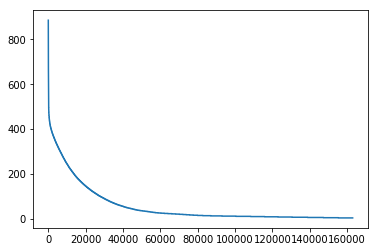

In [843]:
plt.plot(s.get_values())
plt.show()

In [844]:
hits1 = hits[hits.particle_id == 418835796137607168]

In [845]:
hits1.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,weight,vx,vy,vz,px,py,pz,q,nhits,event_id
2,5,-62.6736,-9.37120,-1502.5,7,2,1,418835796137607168,-62.6594,-9.37504,...,0.000009,0.018365,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000
33,38,-62.4736,-9.36801,-1498.0,7,2,4,418835796137607168,-62.4670,-9.35879,...,0.000008,0.018365,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000
1350,1468,-54.1617,-8.55084,-1302.5,7,4,1,418835796137607168,-54.1643,-8.57144,...,0.000005,0.018365,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000
1394,1513,-53.9891,-8.56516,-1298.0,7,4,4,418835796137607168,-53.9735,-8.55208,...,0.000004,0.018365,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000
3014,3244,-45.7137,-7.63520,-1102.5,7,6,1,418835796137607168,-45.6967,-7.65350,...,0.000004,0.018365,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000


In [846]:
hits1.shape

(320, 24)

In [847]:
hits1.event_id.value_counts()

1061    16
1041    15
1037    15
1047    14
1011    14
1004    14
1040    14
1055    13
1089    13
1064    13
1051    12
1029    12
1074    12
1058    12
1045    11
1038    11
1036    11
1063    11
1070    11
1003    11
1000    10
1023    10
1017     9
1096     9
1005     9
1049     7
1092     7
1088     4
Name: event_id, dtype: int64

In [848]:
hits1.volume_id.value_counts()

8     74
9     68
7     64
13    37
14    36
12    17
16    10
18     8
17     6
Name: volume_id, dtype: int64

In [849]:
hits2 = hits1[hits1.event_id == 1088]

In [850]:
hits2

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,weight,vx,vy,vz,px,py,pz,q,nhits,event_id
7923147,17893,-7.82939,-31.0477,-90.7417,8,2,84,418835796137607168,-7.82835,-31.0477,...,0.000034,0.000436,0.003672,-6.75352,-0.06879,-0.313912,-0.842144,1.0,4.0,1088
7931130,26548,-20.23480,-69.2539,-196.7760,8,4,135,418835796137607168,-20.23590,-69.2538,...,0.000018,0.000436,0.003672,-6.75352,-0.06879,-0.313912,-0.842144,1.0,4.0,1088
7937265,33257,-37.14770,-110.5670,-314.5020,8,6,115,418835796137607168,-37.14570,-110.5680,...,0.000010,0.000436,0.003672,-6.75352,-0.06879,-0.313912,-0.842144,1.0,4.0,1088
7942550,39156,-62.80680,-159.7330,-461.1590,8,8,15,418835796137607168,-62.80940,-159.7330,...,0.000021,0.000436,0.003672,-6.75352,-0.06879,-0.313912,-0.842144,1.0,4.0,1088


In [851]:
event_list = list(set(hits1.event_id.values))

In [852]:
print('particle 418835796137607168')
for evt_id in event_list:
    df = hits1[hits1.event_id == evt_id]
    n = df.volume_id.nunique()
    if n > 1:
        print('{}: {}'.format(evt_id, n))

particle 418835796137607168
1036: 3
1037: 4
1040: 3
1041: 3
1045: 3
1047: 3
1051: 4
1055: 5
1063: 4
1064: 4
1070: 4
1074: 3
1089: 3
1092: 2
1096: 2
1004: 4
1011: 3
1017: 3
1023: 3


In [853]:
hits2.volume_id.value_counts()

8    4
Name: volume_id, dtype: int64

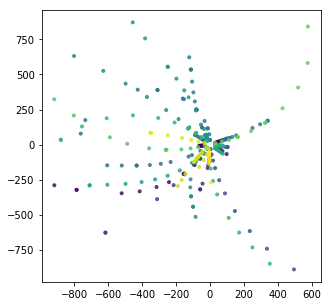

In [854]:
fig =plt.figure(figsize=(5,5))
plt.scatter(hits1.x, hits1.y, alpha=0.8, marker='.', c=hits1.event_id)
plt.show()

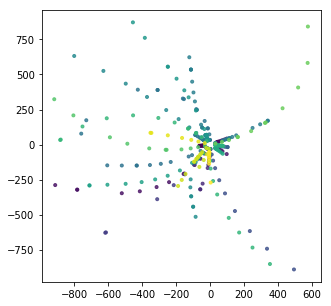

In [855]:
fig =plt.figure(figsize=(5,5))
plt.scatter(hits1.tx, hits1.ty, alpha=0.8, marker='.', c=hits1.event_id)
plt.show()

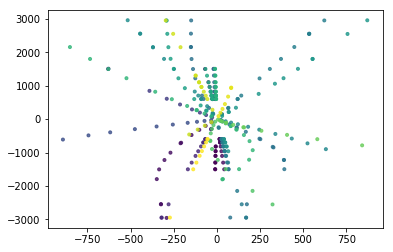

In [53]:
plt.scatter(hits1.y, hits1.z, alpha=0.8, marker='.', c=hits1.event_id)
plt.show()

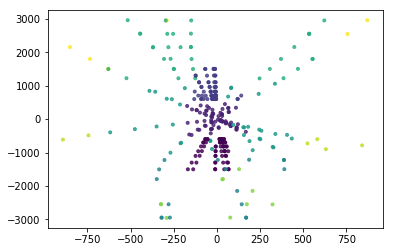

In [54]:
plt.scatter(hits1.y, hits1.z, alpha=0.8, marker='.', c=hits1.volume_id)
plt.show()

In [55]:
hits2 = hits1[hits1.event_id == 1055]

In [56]:
hits2.shape

(13, 24)

In [57]:
hits2

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,weight,vx,vy,vz,px,py,pz,q,nhits,event_id
5045312,20142,-16.7346,-27.3847,105.666,8,2,131,418835796137607168,-16.7383,-27.3829,...,0.000014,-0.012483,0.009142,-9.11517,-0.156188,-0.274198,1.12741,1.0,13.0,1055
5052135,27620,-39.6373,-59.6262,247.421,8,4,325,418835796137607168,-39.6408,-59.6240,...,0.000012,-0.012483,0.009142,-9.11517,-0.156188,-0.274198,1.12741,1.0,13.0,1055
5052146,27631,-40.8760,-61.2235,254.659,8,4,326,418835796137607168,-40.8761,-61.2234,...,0.000010,-0.012483,0.009142,-9.11517,-0.156188,-0.274198,1.12741,1.0,13.0,1055
5057948,34235,-68.3317,-93.4554,406.711,8,6,632,418835796137607168,-68.3330,-93.4547,...,0.000008,-0.012483,0.009142,-9.11517,-0.156188,-0.274198,1.12741,1.0,13.0,1055
5063118,40512,-106.0170,-130.6840,598.000,9,2,16,418835796137607168,-106.0140,-130.6860,...,0.000007,-0.012483,0.009142,-9.11517,-0.156188,-0.274198,1.12741,1.0,13.0,1055
5088065,68195,-177.8400,-185.0720,923.760,13,2,766,418835796137607168,-177.8480,-185.0630,...,0.000006,-0.012483,0.009142,-9.11517,-0.156188,-0.274198,1.12741,1.0,13.0,1055
5100752,85553,-249.5940,-222.4460,1218.500,14,2,21,418835796137607168,-249.9760,-222.8090,...,0.000004,-0.012483,0.009142,-9.11517,-0.156188,-0.274198,1.12741,1.0,13.0,1055
5101783,86754,-323.8150,-249.0340,1501.500,14,4,17,418835796137607168,-323.7610,-248.9700,...,0.000004,-0.012483,0.009142,-9.11517,-0.156188,-0.274198,1.12741,1.0,13.0,1055
5102828,87988,-403.2250,-267.7600,1801.500,14,6,17,418835796137607168,-403.6210,-268.0540,...,0.000004,-0.012483,0.009142,-9.11517,-0.156188,-0.274198,1.12741,1.0,13.0,1055
5103743,89091,-497.9050,-280.5410,2148.500,14,8,13,418835796137607168,-498.0390,-280.6010,...,0.000004,-0.012483,0.009142,-9.11517,-0.156188,-0.274198,1.12741,1.0,13.0,1055


In [58]:
# define model
model = Sequential()
model.add(GRU(10, input_shape=(1,1)))
model.add(Dense(1, activation='linear'))

In [59]:
# compile model
model.compile(loss='mse', optimizer='adam')

In [60]:
X

array([[[0. ]],

       [[0.1]],

       [[0.2]],

       [[0.3]],

       [[0.4]]])

In [61]:
model.fit(X, y, epochs=1000, shuffle=False, verbose=0)

In [62]:
yhat = model.predict(X, verbose=0)
print(yhat)

[[0.10166629]
 [0.19912308]
 [0.29848316]
 [0.399365  ]
 [0.501389  ]]


In [856]:
hits2 = hits[(hits.particle_id == 418835796137607168) | (hits.particle_id == 819655956815151104) | 
             (hits.particle_id == 171140359252869120)]

In [857]:
hits2.shape

(935, 24)

In [858]:
hits2.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,weight,vx,vy,vz,px,py,pz,q,nhits,event_id
2,5,-62.6736,-9.37120,-1502.5,7,2,1,418835796137607168,-62.6594,-9.37504,...,0.000009,0.018365,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000
20,24,-129.1480,-3.79354,-1502.0,7,2,2,819655956815151104,-129.1550,-3.81334,...,0.000006,-0.013211,-0.005251,3.45567,-0.424316,0.022593,-4.91047,-1.0,14.0,1000
33,38,-62.4736,-9.36801,-1498.0,7,2,4,418835796137607168,-62.4670,-9.35879,...,0.000008,0.018365,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000
49,55,-137.6480,-29.06150,-1502.0,7,2,5,171140359252869120,-137.6370,-29.05750,...,0.000005,-12.192700,11.298800,-308.52600,-0.249725,-0.035172,-2.26913,-1.0,14.0,1000
1350,1468,-54.1617,-8.55084,-1302.5,7,4,1,418835796137607168,-54.1643,-8.57144,...,0.000005,0.018365,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000


In [859]:
hits2.event_id.nunique()

59

In [17]:
x1 = np.random.randint(1, 101, size=100)

In [18]:
x1

array([ 18,  34,  10,  58, 100,  94,  14,  84,   1,  73,  70,  17,  44,
        24,  25,  98,  66,  75,  52,  72,  96,  48,  32,  23,  66,   2,
        32,  33,  71,  63,  59,  15,  29,  80,  23,  74,  64,  16,  70,
         3,  67,  74,   6,  92,  29, 100,  28,  82,  43,   5,  81,  66,
        40,   2,  15,  44,  95,  43,  27,   7,  63,   5,  69,  79,   8,
        43,  94,  80,  92,  39,  95,  78,  64,  15,  94,  67,  94,  75,
        59,  27,  55,  92,  57,  99,  20,   3,  52,   3,  98,  48,  74,
        57,  19,  60,  63,  81,   5,  79,  41,  67])

In [19]:
m1 = 5; c1 = 20

In [20]:
y1 = m1*x1 + c1

In [21]:
y1

array([110, 190,  70, 310, 520, 490,  90, 440,  25, 385, 370, 105, 240,
       140, 145, 510, 350, 395, 280, 380, 500, 260, 180, 135, 350,  30,
       180, 185, 375, 335, 315,  95, 165, 420, 135, 390, 340, 100, 370,
        35, 355, 390,  50, 480, 165, 520, 160, 430, 235,  45, 425, 350,
       220,  30,  95, 240, 495, 235, 155,  55, 335,  45, 365, 415,  60,
       235, 490, 420, 480, 215, 495, 410, 340,  95, 490, 355, 490, 395,
       315, 155, 295, 480, 305, 515, 120,  35, 280,  35, 510, 260, 390,
       305, 115, 320, 335, 425,  45, 415, 225, 355])

In [22]:
x2 = np.random.randint(1, 101, size=100)

In [23]:
m2 = 10; c2 = -3

In [24]:
y2 = m2*x2 + c2

In [25]:
x3 = np.random.randint(1, 101, size=100)
m3 = 7; c3 = 12
y3 = m3*x3 + c3

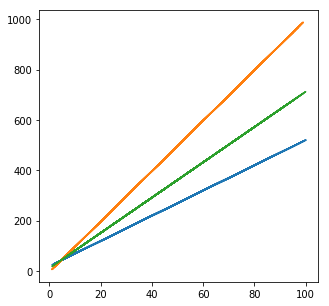

In [26]:
figure = plt.figure(figsize=(5,5))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.show()

In [27]:
df = pd.DataFrame()
df['x'] = x1 
df['y'] = y1
df['t'] = 0

In [28]:
df1 = pd.DataFrame()

df1['x'] = x2 
df1['y'] = y2
df1['t'] = 1

In [29]:
df2 = pd.DataFrame()

df2['x'] = x3 
df2['y'] = y3
df2['t'] = 2

In [30]:
df = df.append([df1, df2])

In [31]:
df.shape

(300, 3)

In [32]:
df.tail()

,x,y,t
95,14,110,2
96,77,551,2
97,89,635,2
98,73,523,2
99,93,663,2


In [33]:
model = Sequential()
model.add(LSTM(100, input_shape=(1,2)))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='mse', optimizer='adam')

In [34]:
y = np_utils.to_categorical(df['t'].values)

In [35]:
df.t.value_counts()

2    100
1    100
0    100
Name: t, dtype: int64

In [36]:
y.shape

(300, 3)

In [37]:
X = df[['x', 'y']].values

In [38]:
X.shape

(300, 2)

In [39]:
%%time

model.fit(X.reshape(300, 1, 2), y, epochs=1000, shuffle=True, verbose=0)

In [40]:
df3 = pd.DataFrame()
df3['x'] = x1 
df3['y'] = y1

In [41]:
model.predict(df3.values.reshape(100, 1, 2))

array([[9.99985933e-01, 8.36089586e-10, 1.40215907e-05],
       [9.99999642e-01, 2.02924587e-11, 4.05324158e-07],
       [9.98778284e-01, 2.21505445e-07, 1.22146262e-03],
       [9.99999881e-01, 3.78467787e-12, 6.52187353e-08],
       [1.00000000e+00, 2.28787388e-12, 2.88835107e-08],
       [1.00000000e+00, 2.29055490e-12, 2.91797022e-08],
       [9.99918938e-01, 5.68399239e-09, 8.10308848e-05],
       [1.00000000e+00, 2.41489142e-12, 3.20196492e-08],
       [9.99993324e-01, 4.85550267e-09, 6.64828121e-06],
       [1.00000000e+00, 2.85372615e-12, 4.21833057e-08],
       [1.00000000e+00, 3.02442663e-12, 4.60765577e-08],
       [9.99979615e-01, 1.24264365e-09, 2.04262979e-05],
       [9.99999881e-01, 6.44831280e-12, 1.34613884e-07],
       [9.99997497e-01, 1.35361944e-10, 2.45534420e-06],
       [9.99998093e-01, 1.07325336e-10, 1.95069742e-06],
       [1.00000000e+00, 2.28899126e-12, 2.89772633e-08],
       [1.00000000e+00, 3.27281778e-12, 5.20870493e-08],
       [1.00000000e+00, 2.74515

In [42]:
x4 = np.random.randint(1, 101, size=100)
y4 = m1*x4 + c1

df4 = pd.DataFrame()
df4['x'] = x4 
df4['y'] = y4

In [43]:
model.predict(df4.values.reshape(100, 1, 2))

array([[9.9999988e-01, 4.9206212e-12, 9.2885479e-08],
       [9.9999988e-01, 3.5819691e-12, 5.9796157e-08],
       [9.9754262e-01, 8.1276232e-07, 2.4566096e-03],
       [9.9999988e-01, 7.2141412e-12, 1.5379078e-07],
       [9.9991894e-01, 5.6839924e-09, 8.1030885e-05],
       [1.0000000e+00, 3.5183809e-12, 5.8163295e-08],
       [9.9999988e-01, 3.9315482e-12, 6.9353774e-08],
       [1.0000000e+00, 3.1438864e-12, 4.8933028e-08],
       [9.9877828e-01, 2.2150545e-07, 1.2214626e-03],
       [1.0000000e+00, 2.5231306e-12, 3.4890373e-08],
       [9.9999464e-01, 3.0482039e-10, 5.3268245e-06],
       [9.9877828e-01, 2.2150545e-07, 1.2214626e-03],
       [1.0000000e+00, 2.7989304e-12, 4.0978133e-08],
       [1.0000000e+00, 2.5895900e-12, 3.6559356e-08],
       [9.9991894e-01, 5.6839924e-09, 8.1030885e-05],
       [1.0000000e+00, 2.7451502e-12, 3.9815440e-08],
       [9.9877828e-01, 2.2150545e-07, 1.2214626e-03],
       [9.9999988e-01, 5.1264539e-12, 9.8367813e-08],
       [9.9474478e-01, 2.236

In [44]:
x5 = np.random.randint(1, 101, size=100)
y5 = m2*x5 + c2

df5 = pd.DataFrame()
df5['x'] = x5 
df5['y'] = y5

In [45]:
model.predict(df5.values.reshape(100, 1, 2))

array([[5.06629128e-10, 9.99990702e-01, 9.24047890e-06],
       [6.58926666e-01, 3.24443012e-01, 1.66303106e-02],
       [1.43929724e-09, 9.99960899e-01, 3.90454770e-05],
       [5.54692070e-10, 9.99989271e-01, 1.07444885e-05],
       [5.10805176e-10, 9.99990582e-01, 9.36759079e-06],
       [6.58926666e-01, 3.24443012e-01, 1.66303106e-02],
       [6.80207446e-10, 9.99984980e-01, 1.50458982e-05],
       [5.92853711e-10, 9.99987960e-01, 1.19998931e-05],
       [6.23575913e-10, 9.99987006e-01, 1.30467097e-05],
       [5.87920601e-10, 9.99988198e-01, 1.18347161e-05],
       [5.06629128e-10, 9.99990702e-01, 9.24047890e-06],
       [1.15767682e-06, 9.91995335e-01, 8.00354593e-03],
       [5.41104439e-10, 9.99989748e-01, 1.03103484e-05],
       [5.78194659e-10, 9.99988437e-01, 1.15115236e-05],
       [8.94170404e-10, 9.99977350e-01, 2.26785160e-05],
       [5.32254463e-10, 9.99989986e-01, 1.00313091e-05],
       [6.56568355e-10, 9.99985814e-01, 1.42021127e-05],
       [7.33581251e-10, 9.99983

In [236]:
hits2.shape

(935, 24)

In [238]:
hits2.event_id.nunique()

59

In [241]:
list_events = list(set(hits2.event_id.values))

In [246]:
len(list_events)

59

In [366]:
train_events = np.random.choice(list_events, 45, replace=False)

In [285]:
train_events

array([1003, 1005, 1087, 1068, 1018, 1083, 1017, 1008, 1091, 1074, 1094,
       1037, 1041, 1025, 1092, 1054, 1000, 1060, 1071, 1029, 1057, 1009,
       1004, 1036, 1047, 1034, 1063, 1070, 1053, 1015, 1098, 1089, 1095,
       1040, 1055, 1082, 1007, 1045, 1050, 1030, 1039, 1061, 1058, 1033,
       1038])

In [286]:
valid_events = set(list_events) - set(train_events)

In [287]:
len(valid_events)

14

In [288]:
valid_events

{1011,
 1014,
 1021,
 1023,
 1026,
 1048,
 1049,
 1051,
 1064,
 1067,
 1073,
 1085,
 1088,
 1096}

In [289]:
test_events = [1017]

In [290]:
train_events = list(set(train_events) - set(test_events))

In [292]:
len(valid_events)

14

In [293]:
len(train_events)

44

In [294]:
df_train = hits2[hits2.event_id.isin(train_events)]
df_valid = hits2[hits2.event_id.isin(valid_events)]
df_test = hits2[hits2.event_id.isin(test_events)]

In [295]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(705, 24)
(208, 24)
(22, 24)


In [296]:
df_test

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,weight,vx,vy,vz,px,py,pz,q,nhits,event_id
1635674,22286,-16.41930,-26.9871,50.2432,8,2,115,418835796137607168,-16.42280,-26.9854,...,0.000031,0.014471,0.019820,-3.23092,-0.548212,-0.919341,1.80998,1.0,9.0,1017
1635731,22345,-6.77043,-31.1074,42.8891,8,2,116,171140359252869120,-6.76697,-31.1076,...,0.000019,-0.003006,0.019437,4.96761,-0.206070,-0.902769,1.10291,-1.0,13.0,1017
1644374,31682,-38.65350,-62.0369,120.4770,8,4,262,418835796137607168,-38.65210,-62.0374,...,0.000025,0.014471,0.019820,-3.23092,-0.548212,-0.919341,1.80998,1.0,9.0,1017
1644382,31691,-14.17010,-70.1986,90.2784,8,4,263,171140359252869120,-14.17240,-70.1983,...,0.000017,-0.003006,0.019437,4.96761,-0.206070,-0.902769,1.10291,-1.0,13.0,1017
1644432,31742,-14.52850,-72.2137,92.7133,8,4,264,171140359252869120,-14.52670,-72.2137,...,0.000014,-0.003006,0.019437,4.96761,-0.206070,-0.902769,1.10291,-1.0,13.0,1017
1651197,39237,-62.60100,-97.8951,193.3510,8,6,477,418835796137607168,-62.60170,-97.8947,...,0.000018,0.014471,0.019820,-3.23092,-0.548212,-0.919341,1.80998,1.0,9.0,1017
1651243,39285,-21.19810,-113.8400,142.8910,8,6,480,171140359252869120,-21.19740,-113.8400,...,0.000011,-0.003006,0.019437,4.96761,-0.206070,-0.902769,1.10291,-1.0,13.0,1017
1656455,45431,-28.38800,-169.5080,209.5760,8,8,720,171140359252869120,-28.39010,-169.5080,...,0.000010,-0.003006,0.019437,4.96761,-0.206070,-0.902769,1.10291,-1.0,13.0,1017
1656882,45917,-28.44810,-170.0020,210.1720,8,8,798,171140359252869120,-28.44510,-170.0020,...,0.000008,-0.003006,0.019437,4.96761,-0.206070,-0.902769,1.10291,-1.0,13.0,1017
1657197,46299,-95.07050,-143.6830,288.2820,8,8,871,418835796137607168,-95.07020,-143.6830,...,0.000015,0.014471,0.019820,-3.23092,-0.548212,-0.919341,1.80998,1.0,9.0,1017


In [300]:
print(df_train.particle_id.nunique())
print(df_valid.particle_id.nunique())
print(df_test.particle_id.nunique())

3
3
2


In [343]:
particle_list = list(set(hits2.particle_id.values))
len(particle_list)

3

In [344]:
nclass = list(range(len(particle_list)))
len(nclass)

3

In [345]:
particle_dict = dict(zip(particle_list, nclass))

In [346]:
len(particle_dict)

3

In [347]:
particle_dict

{171140359252869120: 2, 418835796137607168: 0, 819655956815151104: 1}

In [380]:
reverse_particle_dict = dict(zip(nclass, particle_list))

In [301]:
X_train = df_train[['x', 'y', 'z']].values
X_valid = df_valid[['x', 'y', 'z']].values
X_test = df_test[['x', 'y', 'z']].values

In [348]:
y_train = np_utils.to_categorical(df_train['particle_id'].map(lambda x: particle_dict[x]))
y_valid = np_utils.to_categorical(df_valid['particle_id'].map(lambda x: particle_dict[x]))
y_test = np_utils.to_categorical(df_test['particle_id'].map(lambda x: particle_dict[x]))

In [349]:
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(705, 3)
(208, 3)
(22, 3)


In [398]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(1,3)))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(1024))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [399]:
model.fit(X_train.reshape(705,1,3), y_train, batch_size=128, epochs=1000, shuffle=True, verbose=0)

In [400]:
p = model.predict(X_test.reshape(22,1,3))

In [401]:
p

array([[5.84365265e-11, 9.99999881e-01, 6.45273133e-08],
       [9.14274646e-12, 1.00000000e+00, 3.58615893e-09],
       [3.29496118e-11, 1.00000000e+00, 1.92948484e-08],
       [3.98452649e-09, 9.99999642e-01, 4.01420778e-07],
       [5.22990362e-09, 9.99999523e-01, 4.96854113e-07],
       [3.68657257e-11, 1.00000000e+00, 4.76290367e-08],
       [1.56629287e-08, 9.99998569e-01, 1.42117847e-06],
       [1.85154958e-09, 9.99999642e-01, 4.13189980e-07],
       [1.81565074e-09, 9.99999642e-01, 4.07500835e-07],
       [1.04496745e-10, 9.99999762e-01, 2.36000915e-07],
       [8.63576224e-12, 1.00000000e+00, 3.56344687e-09],
       [1.03908809e-11, 9.99999881e-01, 7.07834715e-08],
       [9.29178609e-13, 1.00000000e+00, 6.98568869e-10],
       [1.00731229e-12, 1.00000000e+00, 7.42882644e-10],
       [1.64312235e-13, 1.00000000e+00, 4.29565716e-09],
       [3.26394537e-13, 1.00000000e+00, 2.21922359e-11],
       [9.68698253e-14, 1.00000000e+00, 3.13233328e-09],
       [7.45459403e-16, 1.00000

In [381]:
particles = [reverse_particle_dict[np.argmax(p[i])] for i in range(len(X_test))]

In [382]:
particles

[819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104]

In [53]:
model = Sequential()
model.add(LSTM(100, input_shape=(1,2)))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [54]:
y = np_utils.to_categorical(df['t'].values)

In [55]:
%%time
model.fit(X.reshape(300, 1, 2), y, epochs=1000, shuffle=True, verbose=0)

CPU times: user 1min 58s, sys: 9.24 s, total: 2min 7s
Wall time: 1min 12s


In [56]:
x6 = np.random.randint(1, 101, size=100)
y6 = m2*x6 + c2

df6 = pd.DataFrame()
df6['x'] = x6 
df6['y'] = y6

In [57]:
model.predict(df6.values.reshape(100, 1, 2))

array([[1.0168009e-08, 9.9955088e-01, 4.4905147e-04],
       [6.9134193e-10, 9.9999774e-01, 2.3137939e-06],
       [6.7350836e-10, 9.9999809e-01, 1.9552476e-06],
       [6.7174816e-10, 9.9999809e-01, 1.9337974e-06],
       [1.9002364e-09, 9.9994648e-01, 5.3526535e-05],
       [6.8898559e-10, 9.9999774e-01, 2.2538022e-06],
       [2.0537967e-10, 9.9999917e-01, 8.5752271e-07],
       [7.0458578e-10, 9.9999714e-01, 2.9131768e-06],
       [6.7867151e-10, 9.9999797e-01, 2.0341556e-06],
       [6.7533229e-10, 9.9999797e-01, 1.9804336e-06],
       [6.7041184e-10, 9.9999809e-01, 1.9190704e-06],
       [6.8898559e-10, 9.9999774e-01, 2.2538022e-06],
       [6.7482497e-10, 9.9999797e-01, 1.9731285e-06],
       [6.9050377e-10, 9.9999774e-01, 2.2910635e-06],
       [7.0014233e-10, 9.9999738e-01, 2.6560042e-06],
       [7.5371630e-02, 9.2022943e-01, 4.3989196e-03],
       [6.9638134e-10, 9.9999750e-01, 2.4848155e-06],
       [6.8971928e-10, 9.9999774e-01, 2.2711713e-06],
       [7.9180429e-10, 9.999

In [58]:
x7 = np.random.randint(1, 101, size=100)
y7 = m3*x7 + c3

df7 = pd.DataFrame()
df7['x'] = x7 
df7['y'] = y7

In [59]:
model.predict(df7.values.reshape(100, 1, 2))

array([[1.65990386e-05, 3.91249394e-10, 9.99983430e-01],
       [6.56019402e-05, 1.44939694e-09, 9.99934435e-01],
       [7.60868251e-01, 3.44351539e-03, 2.35688269e-01],
       [9.81762514e-06, 4.04827560e-10, 9.99990225e-01],
       [8.98593862e-06, 3.90380256e-10, 9.99991059e-01],
       [6.87432885e-06, 2.77222134e-10, 9.99993086e-01],
       [6.49306776e-06, 2.80321072e-10, 9.99993563e-01],
       [2.02059909e-05, 3.86745136e-10, 9.99979734e-01],
       [1.76845351e-05, 3.88743676e-10, 9.99982357e-01],
       [8.34958973e-06, 3.61193103e-10, 9.99991655e-01],
       [4.22036159e-04, 2.66082079e-05, 9.99551356e-01],
       [6.56019402e-05, 1.44939694e-09, 9.99934435e-01],
       [3.90177120e-05, 5.48706969e-10, 9.99961019e-01],
       [3.86849716e-02, 9.30704772e-01, 3.06101236e-02],
       [6.52422113e-06, 2.80049040e-10, 9.99993443e-01],
       [6.40711141e-06, 2.81092066e-10, 9.99993563e-01],
       [2.02059909e-05, 3.86745136e-10, 9.99979734e-01],
       [1.56096758e-05, 3.95252

In [127]:
# generate points in a circle
# https://stackoverflow.com/questions/30564015/how-to-generate-random-points-in-a-circular-distribution


r, theta = [np.sqrt(np.random.randint(0,500))*np.sqrt(500), 2*np.pi*np.random.random()]

In [128]:
r, theta

(486.3126566315132, 4.619664700292915)

In [142]:
math.cos(2.*np.pi/float(100)*float(10))

0.8090169943749475

In [155]:
r = [8 for i in range(100)]
# theta = [2.*np.pi/float(100)*float(x) for x in range(100)]
theta = [2.*np.pi/float(100)*float(x)*np.random.random() for x in range(100)]
df1 = pd.DataFrame()

df1['theta'] = theta
df1['r'] = r
df1['t'] = 1

In [156]:
df.head()

,theta,r
0,0.000000,8
1,0.062832,8
2,0.125664,8
3,0.188496,8
4,0.251327,8


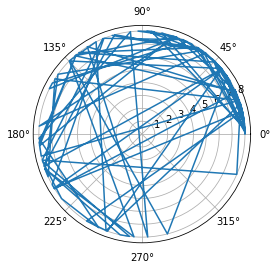

In [157]:
plt.polar(theta,r)

In [158]:
r = [9 for i in range(100)]
# theta = [2.*np.pi/float(100)*float(x) for x in range(100)]
theta = [2.*np.pi/float(100)*float(x)*np.random.random() for x in range(100)]
df2 = pd.DataFrame()

df2['theta'] = theta
df2['r'] = r
df2['t'] = 2

In [160]:
r = [9.5 for i in range(100)]
# theta = [2.*np.pi/float(100)*float(x) for x in range(100)]
theta = [2.*np.pi/float(100)*float(x)*np.random.random() for x in range(100)]
df3 = pd.DataFrame()

df3['theta'] = theta
df3['r'] = r
df3['t'] = 3

In [162]:
df = pd.DataFrame()
df = df.append([df1, df2, df3])

In [163]:
df.shape

(300, 3)

In [184]:
model = Sequential()
model.add(LSTM(100, input_shape=(1,2)))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [185]:
X = df[['r', 'theta']].values

In [186]:
X.shape

(300, 2)

In [187]:
y = np_utils.to_categorical(df['t'].values)

In [188]:
y

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [189]:
%%time
model.fit(X.reshape(300, 1, 2), y, epochs=1000, shuffle=True, verbose=0)

CPU times: user 1min 58s, sys: 9.03 s, total: 2min 7s
Wall time: 1min 13s


In [199]:
r = [9.001 for i in range(10)]
# theta = [2.*np.pi/float(100)*float(x) for x in range(100)]
theta = [2.*np.pi/float(100)*float(x)*np.random.random() for x in range(10)]
df2 = pd.DataFrame()

df2['theta'] = theta
df2['r'] = r
X_test1 = df2[['r', 'theta']].values

In [200]:
model.predict(X_test1.reshape(10, 1, 2))

array([[3.8610497e-09, 1.6725455e-05, 9.9992299e-01, 6.0368864e-05],
       [3.8295789e-09, 1.6659473e-05, 9.9992311e-01, 6.0149399e-05],
       [3.8369854e-09, 1.6674905e-05, 9.9992311e-01, 6.0201568e-05],
       [3.7826338e-09, 1.6563983e-05, 9.9992359e-01, 5.9806178e-05],
       [3.8320125e-09, 1.6664510e-05, 9.9992311e-01, 6.0166665e-05],
       [3.6954633e-09, 1.6396802e-05, 9.9992442e-01, 5.9113576e-05],
       [3.6838033e-09, 1.6375461e-05, 9.9992466e-01, 5.9015358e-05],
       [3.8430943e-09, 1.6687618e-05, 9.9992311e-01, 6.0244642e-05],
       [3.6517012e-09, 1.6318296e-05, 9.9992490e-01, 5.8736816e-05],
       [3.8161194e-09, 1.6631740e-05, 9.9992323e-01, 6.0053058e-05]],
      dtype=float32)

In [215]:
points = PointsInCircum(5, 10)
x = [points[i][0] for i in range(len(points))]
y = [points[i][1] for i in range(len(points))]

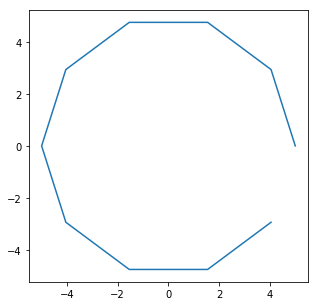

In [216]:
figure=plt.figure(figsize=(5,5))
plt.plot(x,y)

In [248]:
points = PointsInCircum(5.1, 10)
x1 = [points[i][0] for i in range(len(points))]
y1 = [points[i][1] for i in range(len(points))]
df1 = pd.DataFrame()
df1['x'] = x1
df1['y'] = y1
df1['t'] = 0

In [249]:
df1.shape

(10, 3)

In [250]:
points = PointsInCircum(5.2, 11)
x2 = [points[i][0] for i in range(len(points))]
y2 = [points[i][1] for i in range(len(points))]
df2 = pd.DataFrame()
df2['x'] = x2
df2['y'] = y2
df2['t'] = 1

In [251]:
df2.shape

(11, 3)

In [252]:
points = PointsInCircum(5.3, 14)
x3 = [points[i][0] for i in range(len(points))]
y3 = [points[i][1] for i in range(len(points))]
df3 = pd.DataFrame()
df3['x'] = x3
df3['y'] = y3
df3['t'] = 2

In [253]:
df3.shape

(14, 3)

In [254]:

df = pd.DataFrame()
df = df.append([df1, df2, df3])

In [255]:
df.head()

,x,y,t
0,5.100000,0.000000,0
1,4.125987,2.997705,0
2,1.575987,4.850388,0
3,-1.575987,4.850388,0
4,-4.125987,2.997705,0


In [256]:
X = df[['x', 'y']].values

In [259]:
X.shape

(35, 2)

In [257]:
y = np_utils.to_categorical(df['t'].values)

In [283]:
model = Sequential()
model.add(LSTM(35, input_shape=(1,2)))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [284]:
%%time
model.fit(X.reshape(35, 1, 2), y, epochs=10000, shuffle=False, verbose=0)

CPU times: user 3min 57s, sys: 18 s, total: 4min 15s
Wall time: 2min 26s


In [285]:
points = PointsInCircum(5.1, 7)
x4 = [points[i][0] for i in range(len(points))]
y4 = [points[i][1] for i in range(len(points))]
df4 = pd.DataFrame()
df4['x'] = x4
df4['y'] = y4
X_test = df4.values

In [286]:
X_test.shape

(7, 2)

In [287]:
model.predict(X_test.reshape(7,1,2)) # fails to find correct circle

array([[9.9980587e-01, 1.9414890e-04, 1.9738866e-15],
       [9.9853528e-01, 1.4104317e-03, 5.4249875e-05],
       [9.9565339e-01, 4.3465565e-03, 2.1614176e-10],
       [2.1487789e-02, 2.9765744e-02, 9.4874650e-01],
       [5.3465672e-05, 2.0055268e-05, 9.9992645e-01],
       [1.4088504e-03, 8.8955770e-05, 9.9850225e-01],
       [1.4015412e-04, 6.9160400e-05, 9.9979073e-01]], dtype=float32)

In [292]:
points = PointsInCircum(5.1, 40)
x1 = [points[i][0] for i in range(len(points))]
y1 = [points[i][1] for i in range(len(points))]
df1 = pd.DataFrame()
df1['x'] = x1
df1['y'] = y1
df1['t'] = 0

points = PointsInCircum(5.2, 43)
x2 = [points[i][0] for i in range(len(points))]
y2 = [points[i][1] for i in range(len(points))]
df2 = pd.DataFrame()
df2['x'] = x2
df2['y'] = y2
df2['t'] = 1

points = PointsInCircum(5.3, 45)
x3 = [points[i][0] for i in range(len(points))]
y3 = [points[i][1] for i in range(len(points))]
df3 = pd.DataFrame()
df3['x'] = x3
df3['y'] = y3
df3['t'] = 2

df = pd.DataFrame()
df = df.append([df1, df2, df3])

X = df[['x', 'y']].values

y = np_utils.to_categorical(df['t'].values)

In [293]:
X.shape

(128, 2)

In [298]:
model = Sequential()
model.add(LSTM(128, input_shape=(1,2)))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [299]:
%%time
model.fit(X.reshape(128, 1, 2), y, batch_size=128, epochs=1000, shuffle=False, verbose=0)

CPU times: user 13.6 s, sys: 844 ms, total: 14.5 s
Wall time: 9.1 s


In [300]:
points = PointsInCircum(5.1, 7)
x4 = [points[i][0] for i in range(len(points))]
y4 = [points[i][1] for i in range(len(points))]
df4 = pd.DataFrame()
df4['x'] = x4
df4['y'] = y4
X_test = df4.values

In [301]:
model.predict(X_test.reshape(7,1,2)) # works well with 40 points

array([[9.7693276e-01, 2.3066726e-02, 4.9097451e-07],
       [9.7264874e-01, 2.7350849e-02, 5.0106394e-07],
       [9.7035867e-01, 2.9640671e-02, 7.0560549e-07],
       [9.6975547e-01, 3.0243607e-02, 8.7576757e-07],
       [9.7056389e-01, 2.9435415e-02, 7.1917100e-07],
       [9.7296357e-01, 2.7035641e-02, 8.0235003e-07],
       [9.7512674e-01, 2.4872517e-02, 6.8812511e-07]], dtype=float32)

In [309]:
points = PointsInCircum(5.1, 10)
x1 = [points[i][0] for i in range(len(points))]
y1 = [points[i][1] for i in range(len(points))]
df1 = pd.DataFrame()
df1['x'] = x1
df1['y'] = y1
df1['t'] = 0

points = PointsInCircum(5.2, 13)
x2 = [points[i][0] for i in range(len(points))]
y2 = [points[i][1] for i in range(len(points))]
df2 = pd.DataFrame()
df2['x'] = x2
df2['y'] = y2
df2['t'] = 1

points = PointsInCircum(5.3, 15)
x3 = [points[i][0] for i in range(len(points))]
y3 = [points[i][1] for i in range(len(points))]
df3 = pd.DataFrame()
df3['x'] = x3
df3['y'] = y3
df3['t'] = 2

df = pd.DataFrame()
df = df.append([df1, df2, df3])

X = df[['x', 'y']].values

y = np_utils.to_categorical(df['t'].values)

model = Sequential()
model.add(LSTM(38, input_shape=(1,2)))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

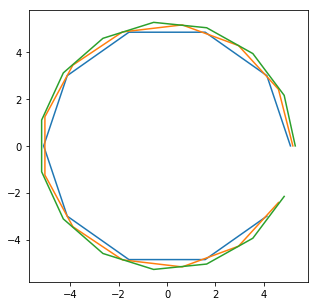

In [322]:
figure = plt.figure(figsize=(5,5))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)

In [311]:
%%time
model.fit(X.reshape(38, 1, 2), y, batch_size=68, epochs=1000, shuffle=False, verbose=0)

CPU times: user 13.9 s, sys: 815 ms, total: 14.8 s
Wall time: 9.42 s


In [312]:
model.predict(X_test.reshape(7,1,2)) # works with 20 points, does not work with 10 points

array([[0.31472838, 0.3330711 , 0.3522005 ],
       [0.11199336, 0.40796885, 0.48003775],
       [0.28142112, 0.37822747, 0.34035134],
       [0.14935364, 0.38588285, 0.46476352],
       [0.2142318 , 0.22062224, 0.56514597],
       [0.31189334, 0.34883395, 0.3392727 ],
       [0.10421292, 0.43130812, 0.464479  ]], dtype=float32)

In [345]:
# works with 10,13,15 points
model = Sequential()
model.add(Bidirectional(LSTM(38, return_sequences=True), input_shape=(1,2)))
model.add(LSTM(38))
model.add(Dense(20, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [346]:
%%time
model.fit(X.reshape(38, 1, 2), y, batch_size=38, epochs=1000, shuffle=False, verbose=0)

CPU times: user 25.2 s, sys: 1.45 s, total: 26.6 s
Wall time: 18.9 s


In [347]:
model.predict(X_test.reshape(7,1,2)) # works with 10,13,15 points

array([[9.7104836e-01, 2.8950555e-02, 9.8689884e-07],
       [9.3692803e-01, 6.3070320e-02, 1.6555852e-06],
       [9.9713969e-01, 2.8602441e-03, 9.9841500e-08],
       [9.9369264e-01, 6.3074003e-03, 4.9569775e-09],
       [9.8983788e-01, 1.0161238e-02, 8.7876845e-07],
       [9.9031001e-01, 9.6890125e-03, 9.4884416e-07],
       [9.3791401e-01, 6.1822031e-02, 2.6395160e-04]], dtype=float32)

In [348]:
points = PointsInCircum(5.1, 7)
x1 = [points[i][0] for i in range(len(points))]
y1 = [points[i][1] for i in range(len(points))]
df1 = pd.DataFrame()
df1['x'] = x1
df1['y'] = y1
df1['t'] = 0

points = PointsInCircum(5.2, 10)
x2 = [points[i][0] for i in range(len(points))]
y2 = [points[i][1] for i in range(len(points))]
df2 = pd.DataFrame()
df2['x'] = x2
df2['y'] = y2
df2['t'] = 1

points = PointsInCircum(5.3, 12)
x3 = [points[i][0] for i in range(len(points))]
y3 = [points[i][1] for i in range(len(points))]
df3 = pd.DataFrame()
df3['x'] = x3
df3['y'] = y3
df3['t'] = 2

df = pd.DataFrame()
df = df.append([df1, df2, df3])

X = df[['x', 'y']].values

y = np_utils.to_categorical(df['t'].values)



In [351]:
model = Sequential()
model.add(Bidirectional(LSTM(29, return_sequences=True), input_shape=(1,2)))
model.add(LSTM(29))
model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [352]:
%%time
model.fit(X.reshape(29, 1, 2), y, batch_size=38, epochs=1000, shuffle=False, verbose=0)

CPU times: user 25.1 s, sys: 1.39 s, total: 26.5 s
Wall time: 19 s


In [353]:
model.predict(X_test.reshape(7,1,2)) # works mostly with 7, 10, 12 points

array([[3.7336236e-01, 3.2362387e-01, 3.0301377e-01],
       [9.9603301e-01, 1.9831557e-04, 3.7686951e-03],
       [9.9832946e-01, 1.6321138e-03, 3.8486673e-05],
       [9.9019009e-01, 8.7135966e-04, 8.9385863e-03],
       [9.9333811e-01, 8.3610507e-07, 6.6610677e-03],
       [9.8582226e-01, 1.4170409e-02, 7.3364918e-06],
       [9.9223071e-01, 4.4533896e-05, 7.7246628e-03]], dtype=float32)

In [440]:
points = PointsInCircum(5.1, 5)
x1 = [points[i][0] for i in range(len(points))]
y1 = [points[i][1] for i in range(len(points))]
df1 = pd.DataFrame()
df1['x'] = x1
df1['y'] = y1
df1['t'] = 0

points = PointsInCircum(5.2, 8)
x2 = [points[i][0] for i in range(len(points))]
y2 = [points[i][1] for i in range(len(points))]
df2 = pd.DataFrame()
df2['x'] = x2
df2['y'] = y2
df2['t'] = 1

points = PointsInCircum(5.3, 9)
x3 = [points[i][0] for i in range(len(points))]
y3 = [points[i][1] for i in range(len(points))]
df3 = pd.DataFrame()
df3['x'] = x3
df3['y'] = y3
df3['t'] = 2

df = pd.DataFrame()
df = df.append([df1, df2, df3])

X = df[['x', 'y']].values

y = np_utils.to_categorical(df['t'].values)


In [441]:
# does not work with 5,8,9 points
# works for 5,5,5, points (5 out of 7)
model = Sequential()
model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=(1,2)))
model.add(Bidirectional(LSTM(10, return_sequences=True)))

model.add(Bidirectional(LSTM(10)))
model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [442]:
%%time
model.fit(X.reshape(22, 1, 2), y, batch_size=10, epochs=1000, shuffle=False, verbose=0)

CPU times: user 2min 2s, sys: 5.7 s, total: 2min 8s
Wall time: 1min 35s


In [443]:
model.predict(X_test.reshape(7,1,2)) # does not work with 5,8,9 points

array([[2.4102789e-01, 5.0208718e-01, 2.5688499e-01],
       [9.7156310e-01, 2.8118867e-02, 3.1805265e-04],
       [1.3016262e-07, 9.6155173e-01, 3.8448129e-02],
       [6.3790160e-01, 3.5985759e-01, 2.2408152e-03],
       [8.6229551e-01, 1.3765001e-01, 5.4507032e-05],
       [3.4517205e-11, 3.0781668e-01, 6.9218326e-01],
       [8.4085828e-01, 1.5912934e-01, 1.2423185e-05]], dtype=float32)

In [479]:
points = PointsInCircum(5.1, 5)
x1 = [points[i][0] for i in range(len(points))]
y1 = [points[i][1] for i in range(len(points))]
df1 = pd.DataFrame()
df1['x'] = x1
df1['y'] = y1
df1['t'] = 0

points = PointsInCircum(5.2, 5)
x2 = [points[i][0] for i in range(len(points))]
y2 = [points[i][1] for i in range(len(points))]
df2 = pd.DataFrame()
df2['x'] = x2
df2['y'] = y2
df2['t'] = 1

points = PointsInCircum(5.3, 5)
x3 = [points[i][0] for i in range(len(points))]
y3 = [points[i][1] for i in range(len(points))]
df3 = pd.DataFrame()
df3['x'] = x3
df3['y'] = y3
df3['t'] = 2

df = pd.DataFrame()
df = df.append([df1, df2, df3])

X = df[['x', 'y']].values

y = np_utils.to_categorical(df['t'].values)

In [480]:
# does not work with 5,8,9 points
# works for 5,5,5, points (7 out of 7)
model = Sequential()
model.add(BatchNormalization(input_shape=(1,2)))
model.add(Bidirectional(LSTM(15, return_sequences=True)))
model.add(Bidirectional(LSTM(15, return_sequences=True)))
model.add(Bidirectional(LSTM(15, return_sequences=True)))
model.add(Bidirectional(LSTM(15)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [481]:
%%time
model.fit(X.reshape(15, 1, 2), y, batch_size=15, epochs=5000, shuffle=False, verbose=0)

CPU times: user 4min 17s, sys: 12.2 s, total: 4min 29s
Wall time: 3min 17s


In [482]:
model.predict(X_test.reshape(7,1,2)) # does not work with 5,8,9 points, works with 5,5,5

array([[9.9999988e-01, 1.6969518e-07, 8.1595420e-18],
       [9.9999988e-01, 1.0957932e-07, 4.2115318e-18],
       [6.6054451e-01, 3.3945435e-01, 1.1671467e-06],
       [9.9999976e-01, 1.8554211e-07, 1.3888217e-17],
       [1.0000000e+00, 3.2895784e-08, 2.4401539e-19],
       [9.9999988e-01, 1.2145426e-07, 1.6268831e-18],
       [9.9999988e-01, 6.9570532e-08, 1.1248089e-18]], dtype=float32)

In [455]:
points = PointsInCircum(5.1, 5)
x1 = [points[i][0] for i in range(len(points))]
y1 = [points[i][1] for i in range(len(points))]
df1 = pd.DataFrame()
df1['x'] = x1
df1['y'] = y1
df1['t'] = 0

points = PointsInCircum(5.2, 8)
x2 = [points[i][0] for i in range(len(points))]
y2 = [points[i][1] for i in range(len(points))]
df2 = pd.DataFrame()
df2['x'] = x2
df2['y'] = y2
df2['t'] = 1

points = PointsInCircum(5.3, 9)
x3 = [points[i][0] for i in range(len(points))]
y3 = [points[i][1] for i in range(len(points))]
df3 = pd.DataFrame()
df3['x'] = x3
df3['y'] = y3
df3['t'] = 2

df = pd.DataFrame()
df = df.append([df1, df2, df3])

X = df[['x', 'y']].values

y = np_utils.to_categorical(df['t'].values)


In [456]:
# does not work with 5,8,9 points
# works for 5,5,5, points (7 out of 7)
model = Sequential()
model.add(BatchNormalization(input_shape=(1,2)))
model.add(Bidirectional(LSTM(15, return_sequences=True)))
model.add(Bidirectional(LSTM(15, return_sequences=True)))
model.add(Bidirectional(LSTM(15, return_sequences=True)))
model.add(Bidirectional(LSTM(15)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [457]:
%%time
model.fit(X.reshape(22, 1, 2), y, batch_size=15, epochs=7000, shuffle=False, verbose=0)

CPU times: user 10min 41s, sys: 34 s, total: 11min 15s
Wall time: 7min 55s


In [458]:
model.predict(X_test.reshape(7,1,2)) # does not work with 5,8,9 points

array([[7.4389840e-25, 1.2134108e-06, 9.9999881e-01],
       [1.7922829e-22, 2.3700804e-06, 9.9999762e-01],
       [9.0610090e-16, 9.9455750e-01, 5.4425783e-03],
       [8.6426643e-15, 5.8340896e-07, 9.9999940e-01],
       [9.6121918e-35, 6.6100888e-12, 1.0000000e+00],
       [9.9999511e-01, 4.8932834e-06, 1.0239955e-13],
       [1.9795607e-16, 9.9988067e-01, 1.1931926e-04]], dtype=float32)

In [736]:
# r = [8 for i in range(10)]
# # theta = [2.*np.pi/float(100)*float(x) for x in range(100)]
# theta = [2.*np.pi/float(100)*float(x)*np.random.random() for x in range(10)]
# df1 = pd.DataFrame()

# df1['x'] = theta
# df1['y'] = r
# df1['t'] = 0

# r = [8.1 for i in range(10)]
# # theta = [2.*np.pi/float(100)*float(x) for x in range(100)]
# theta = [2.*np.pi/float(100)*float(x)*np.random.random() for x in range(10)]
# df2 = pd.DataFrame()

# df2['x'] = theta
# df2['y'] = r
# df2['t'] = 1

# r = [8.2 for i in range(12)]
# # theta = [2.*np.pi/float(100)*float(x) for x in range(100)]
# theta = [2.*np.pi/float(100)*float(x)*np.random.random() for x in range(12)]
# df3 = pd.DataFrame()

# df3['x'] = theta
# df3['y'] = r
# df3['t'] = 2


points = PointsInCircum(6.1, 9)
x4 = [points[i][0] for i in range(len(points))]
y4 = [points[i][1] for i in range(len(points))]
df4 = pd.DataFrame()
df4['x'] = x4
df4['y'] = y4
df4['t'] = 3

points = PointsInCircum(6.2, 10)
x5 = [points[i][0] for i in range(len(points))]
y5 = [points[i][1] for i in range(len(points))]
df5 = pd.DataFrame()
df5['x'] = x5
df5['y'] = y5
df5['t'] = 4

points = PointsInCircum(6.3, 9)
x6 = [points[i][0] for i in range(len(points))]
y6 = [points[i][1] for i in range(len(points))]
df6 = pd.DataFrame()
df6['x'] = x6
df6['y'] = y6
df6['t'] = 5


x7 = np.random.randint(1, 10, size=12)
m7=1
c7=2
y7 = m7*x7 + c7
df7 = pd.DataFrame()
df7['x'] = x7
df7['y'] = y7
df7['t'] = 6

x8 = np.random.randint(1, 10, size=12)
m8=2
c8=-3
y8 = m8*x8 + c8
df8 = pd.DataFrame()
df8['x'] = x8
df8['y'] = y8
df8['t'] = 7

df = pd.DataFrame()
df = df.append([df4, df5, df6])

X = df[['x', 'y']].values

y = np_utils.to_categorical(df['t'].values)



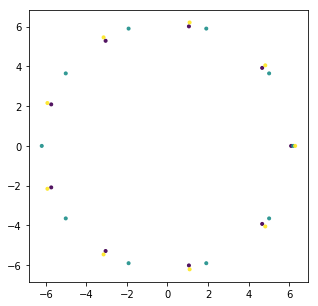

In [737]:
figure = plt.figure(figsize=(5,5))
plt.scatter(df.x, df.y, marker='.', alpha=0.9, c=df.t.values)
plt.show()

In [738]:
r = [8.1 for i in range(9)]
# theta = [2.*np.pi/float(100)*float(x) for x in range(100)]
theta = [2.*np.pi/float(100)*float(x)*np.random.random() for x in range(9)]
df9 = pd.DataFrame()

df9['x'] = theta
df9['y'] = r
#t = 1


x10 = np.random.randint(1, 10, size=12)

y10 = m8*x10 + c8
df10 = pd.DataFrame()
df10['x'] = x10
df10['y'] = y10
#t = 7

points = PointsInCircum(6.2, 8)
x11 = [points[i][0] for i in range(len(points))]
y11 = [points[i][1] for i in range(len(points))]
df11 = pd.DataFrame()
df11['x'] = x11
df11['y'] = y11
# df5['t'] = 4


df_test = pd.DataFrame()
df_test = df_test.append([df11])
X_test = df_test[['x', 'y']].values

In [739]:
X.shape

(28, 2)

In [740]:
df.head()

,x,y,t
0,6.100000,0.000000,3
1,4.672871,3.921004,3
2,1.059254,6.007327,3
3,-3.050000,5.282755,3
4,-5.732125,2.086323,3


In [741]:
X_test.shape

(8, 2)

In [742]:
X_test

array([[ 6.20000000e+00,  0.00000000e+00],
       [ 4.38406204e+00,  4.38406204e+00],
       [ 3.79640508e-16,  6.20000000e+00],
       [-4.38406204e+00,  4.38406204e+00],
       [-6.20000000e+00,  7.59281015e-16],
       [-4.38406204e+00, -4.38406204e+00],
       [-1.13892152e-15, -6.20000000e+00],
       [ 4.38406204e+00, -4.38406204e+00]])

In [753]:
model = Sequential()
# model.add(BatchNormalization(input_shape=(1,2)))
model.add(Bidirectional(LSTM(2, return_sequences=True), input_shape=(1,2)))
# model.add(Bidirectional(LSTM(2, return_sequences=True)))
# model.add(Bidirectional(LSTM(2, return_sequences=True)))
model.add(Bidirectional(LSTM(2)))
# model.add(Dropout(0.3))
model.add(Dense(2, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [754]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=10)
# model.fit(predictors, target, validation_split=0.3, epochs=100, callbacks=[early_stopping_monitor])

In [755]:
%%time
# model.fit(X.reshape(52, 1, 2), y,epochs=3000, validation_split=0.3,  callbacks=[early_stopping_monitor],
#           shuffle=False, verbose=0)

model.fit(X.reshape(28, 1, 2), y,epochs=3000, shuffle=False, verbose=0)

CPU times: user 2min 10s, sys: 4.47 s, total: 2min 14s
Wall time: 1min 47s


In [756]:
p = model.predict(X_test.reshape(8,1,2))

In [757]:
p

array([[0.01288337, 0.01288641, 0.01281713, 0.29711086, 0.36702117,
        0.2972811 ],
       [0.01288337, 0.01288641, 0.01281713, 0.29711086, 0.36702117,
        0.2972811 ],
       [0.01288337, 0.01288641, 0.01281713, 0.29711086, 0.36702117,
        0.2972811 ],
       [0.01288337, 0.01288641, 0.01281713, 0.29711086, 0.36702117,
        0.2972811 ],
       [0.01288337, 0.01288641, 0.01281713, 0.29711086, 0.36702117,
        0.2972811 ],
       [0.01288337, 0.01288641, 0.01281713, 0.29711086, 0.36702117,
        0.2972811 ],
       [0.01288337, 0.01288641, 0.01281713, 0.29711086, 0.36702117,
        0.2972811 ],
       [0.01288337, 0.01288641, 0.01281713, 0.29711086, 0.36702117,
        0.2972811 ]], dtype=float32)

In [758]:
p = [np.argmax(p[i]) for i in range(len(X_test))]

In [759]:
p

[4, 4, 4, 4, 4, 4, 4, 4]

In [799]:
# r = [8 for i in range(10)]
# # theta = [2.*np.pi/float(100)*float(x) for x in range(100)]
# theta = [2.*np.pi/float(100)*float(x)*np.random.random() for x in range(10)]
# df1 = pd.DataFrame()

# df1['x'] = theta
# df1['y'] = r
# df1['t'] = 0

# r = [8.1 for i in range(10)]
# # theta = [2.*np.pi/float(100)*float(x) for x in range(100)]
# theta = [2.*np.pi/float(100)*float(x)*np.random.random() for x in range(10)]
# df2 = pd.DataFrame()

# df2['x'] = theta
# df2['y'] = r
# df2['t'] = 1

# r = [8.2 for i in range(12)]
# # theta = [2.*np.pi/float(100)*float(x) for x in range(100)]
# theta = [2.*np.pi/float(100)*float(x)*np.random.random() for x in range(12)]
# df3 = pd.DataFrame()

# df3['x'] = theta
# df3['y'] = r
# df3['t'] = 2


points = PointsInCircum(6.1, 50)
x4 = [points[i][0] for i in range(len(points))]
y4 = [points[i][1] for i in range(len(points))]
df4 = pd.DataFrame()
df4['x'] = x4
df4['y'] = y4
df4['t'] = 3

X4 = df4[['x', 'y']].values

points = PointsInCircum(6.2, 50)
x5 = [points[i][0] for i in range(len(points))]
y5 = [points[i][1] for i in range(len(points))]
df5 = pd.DataFrame()
df5['x'] = x5
df5['y'] = y5
df5['t'] = 4

X4 = df5[['x', 'y']].values

points = PointsInCircum(6.3, 50)
x6 = [points[i][0] for i in range(len(points))]
y6 = [points[i][1] for i in range(len(points))]
df6 = pd.DataFrame()
df6['x'] = x6
df6['y'] = y6
df6['t'] = 5


x7 = np.random.randint(1, 500, size=50)
m7=1
c7=2
y7 = m7*x7 + c7
df7 = pd.DataFrame()
df7['x'] = x7
df7['y'] = y7
df7['t'] = 6

x8 = np.random.randint(1, 500, size=50)
m8=2
c8=-3
y8 = m8*x8 + c8
df8 = pd.DataFrame()
df8['x'] = x8
df8['y'] = y8
df8['t'] = 7

df = pd.DataFrame()
df = df.append([df4, df5, df6, df7, df8])

X = df[['x', 'y']].values

y = np_utils.to_categorical(df['t'].values)



In [800]:
X.shape

(250, 2)

In [801]:
df.head()

,x,y,t
0,6.100000,0.000000,3
1,6.051900,0.764533,3
2,5.908357,1.517008,3
3,5.671637,2.245560,3
4,5.345471,2.938697,3


In [802]:
r = [8.1 for i in range(9)]
# theta = [2.*np.pi/float(100)*float(x) for x in range(100)]
theta = [2.*np.pi/float(100)*float(x)*np.random.random() for x in range(9)]
df9 = pd.DataFrame()

df9['x'] = theta
df9['y'] = r
#t = 1


x10 = np.random.randint(1, 10, size=12)

y10 = m8*x10 + c8
df10 = pd.DataFrame()
df10['x'] = x10
df10['y'] = y10
#t = 7

points = PointsInCircum(6.2, 8)
x11 = [points[i][0] for i in range(len(points))]
y11 = [points[i][1] for i in range(len(points))]
df11 = pd.DataFrame()
df11['x'] = x11
df11['y'] = y11
# df5['t'] = 4


df_test = pd.DataFrame()
df_test = df_test.append([df10, df11])
X_test = df_test[['x', 'y']].values

In [803]:
X_test.shape

(20, 2)

In [828]:
model = Sequential()
# model.add(BatchNormalization(input_shape=(1,2)))
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(1,2)))
# model.add(Bidirectional(LSTM(100, return_sequences=True)))
# model.add(Bidirectional(LSTM(2, return_sequences=True)))
model.add(Bidirectional(LSTM(100)))
# model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [829]:
# t - number of time steps
# n - length of input vector in each time step
# m - length of output vector (number of classes)
# i - number of training examples

# The minimum number of training examples is what you have up there:

# 4(nm+n2)

In [830]:
%%time
model.fit(X.reshape(250, 1, 2), y,epochs=5000, batch_size= 128, shuffle=False, verbose=0)

CPU times: user 6min 3s, sys: 16 s, total: 6min 19s
Wall time: 4min 47s


In [831]:
p = model.predict(X_test.reshape(20,1,2))

In [832]:
p

array([[7.71491246e-19, 6.58791972e-20, 1.16362839e-17, 9.95855868e-01,
        2.00041658e-18, 7.28966456e-26, 4.14414192e-03, 2.26509911e-27],
       [6.79924224e-18, 1.57684727e-18, 1.47213499e-17, 2.66601907e-31,
        3.02069025e-12, 9.99999881e-01, 8.13107590e-08, 1.58518332e-09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.43810603e-05, 2.15762717e-04, 9.99769866e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.43810603e-05, 2.15762717e-04, 9.99769866e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.23554955e-05, 2.08879228e-05, 9.99966741e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.16565488e-05, 9.99969125e-01, 1.92320404e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.17161026e-05, 1.26267029e-02, 9.

In [833]:
p = [np.argmax(p[i]) for i in range(len(X_test))]

In [834]:
p

[3, 5, 7, 7, 7, 6, 7, 7, 5, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4]

In [837]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,weight,vx,vy,vz,px,py,pz,q,nhits,event_id
0,2,-55.3361,0.635342,-1502.5,7,2,1,22525763437723648,-55.3385,0.630805,...,0.000010,-0.015802,0.006381,1.16279,-0.569670,-0.011187,-15.49600,1.0,10.0,1000
1,4,-96.1091,-8.241030,-1502.5,7,2,1,297237712845406208,-96.1229,-8.230360,...,0.000008,-0.000486,-0.015051,5.75865,-0.240629,0.012071,-3.70766,-1.0,11.0,1000
2,5,-62.6736,-9.371200,-1502.5,7,2,1,418835796137607168,-62.6594,-9.375040,...,0.000009,0.018365,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000
3,6,-57.0687,-8.177770,-1502.5,7,2,1,108087696726949888,-57.0856,-8.189710,...,0.000008,0.010383,-0.012398,3.92894,-0.392669,-0.075470,-10.47140,1.0,11.0,1000
4,7,-73.8723,-2.578900,-1502.5,7,2,1,968286151951515648,-73.8608,-2.575860,...,0.000007,-0.004178,0.004751,-5.12884,-0.453130,0.008006,-9.13374,-1.0,13.0,1000


In [838]:
hits.shape

(9009603, 24)

In [ ]:
# hits2 = hits[(hits.particle_id == 418835796137607168) | (hits.particle_id == 819655956815151104) | 
#              (hits.particle_id == 171140359252869120)]

In [860]:
hits2.shape

(935, 24)

In [861]:
hits2.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,weight,vx,vy,vz,px,py,pz,q,nhits,event_id
2,5,-62.6736,-9.37120,-1502.5,7,2,1,418835796137607168,-62.6594,-9.37504,...,0.000009,0.018365,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000
20,24,-129.1480,-3.79354,-1502.0,7,2,2,819655956815151104,-129.1550,-3.81334,...,0.000006,-0.013211,-0.005251,3.45567,-0.424316,0.022593,-4.91047,-1.0,14.0,1000
33,38,-62.4736,-9.36801,-1498.0,7,2,4,418835796137607168,-62.4670,-9.35879,...,0.000008,0.018365,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000
49,55,-137.6480,-29.06150,-1502.0,7,2,5,171140359252869120,-137.6370,-29.05750,...,0.000005,-12.192700,11.298800,-308.52600,-0.249725,-0.035172,-2.26913,-1.0,14.0,1000
1350,1468,-54.1617,-8.55084,-1302.5,7,4,1,418835796137607168,-54.1643,-8.57144,...,0.000005,0.018365,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000


In [886]:
grouped = hits2.groupby('particle_id', as_index=False)

In [887]:
for particle_id, group in grouped:
    print(particle_id)
    print(group)

171140359252869120
         hit_id          x           y          z  volume_id  layer_id  \
49           55  -137.6480  -29.061500 -1502.0000          7         2   
1368       1487  -117.3900  -19.328500 -1298.0000          7         4   
1400       1520  -117.7900  -19.511200 -1302.0000          7         4   
3012       3242   -97.2391  -11.088500 -1102.5000          7         6   
5074       5417   -82.6888   -5.730350  -962.5000          7         8   
7479       7952   -67.9431   -0.844292  -822.5000          7        10   
10190     10766   -67.4149   -0.687808  -817.5000          7        10   
10280     10859   -55.1044    2.709920  -702.5000          7        12   
13088     13794   -54.5745    2.865700  -697.5000          7        12   
15965     16780   -44.2559    5.405700  -602.0000          7        14   
16029     16845   -43.7634    5.525670  -597.5000          7        14   
16069     16901   -31.5292    8.084200  -484.8980          8         2   
58491     63303  -2

In [888]:
df = pd.DataFrame()
for particle_id, group in grouped:
    print(particle_id)
    df = df.append(pd.DataFrame(group))

171140359252869120
418835796137607168
819655956815151104


In [889]:
df.shape

(935, 24)

In [890]:
df.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,weight,vx,vy,vz,px,py,pz,q,nhits,event_id
49,55,-137.6480,-29.06150,-1502.0,7,2,5,171140359252869120,-137.6370,-29.05750,...,0.000005,-12.1927,11.2988,-308.526,-0.249725,-0.035172,-2.26913,-1.0,14.0,1000
1368,1487,-117.3900,-19.32850,-1298.0,7,4,3,171140359252869120,-117.3880,-19.33010,...,0.000003,-12.1927,11.2988,-308.526,-0.249725,-0.035172,-2.26913,-1.0,14.0,1000
1400,1520,-117.7900,-19.51120,-1302.0,7,4,5,171140359252869120,-117.7920,-19.50960,...,0.000004,-12.1927,11.2988,-308.526,-0.249725,-0.035172,-2.26913,-1.0,14.0,1000
3012,3242,-97.2391,-11.08850,-1102.5,7,6,1,171140359252869120,-97.2457,-11.10240,...,0.000003,-12.1927,11.2988,-308.526,-0.249725,-0.035172,-2.26913,-1.0,14.0,1000
5074,5417,-82.6888,-5.73035,-962.5,7,8,1,171140359252869120,-82.6859,-5.70958,...,0.000003,-12.1927,11.2988,-308.526,-0.249725,-0.035172,-2.26913,-1.0,14.0,1000


In [891]:
df.event_id.value_counts()

1000    38
1038    36
1011    28
1023    25
1004    25
1037    25
1073    25
1074    25
1050    24
1070    24
1003    23
1055    23
1058    23
1063    23
1029    22
1017    22
1045    22
1014    21
1005    18
1025    17
1061    16
1008    16
1087    15
1041    15
1096    15
1098    14
1009    14
1040    14
1047    14
1064    13
1026    13
1089    13
1082    13
1071    13
1067    12
1051    12
1083    12
1034    12
1091    12
1015    12
1068    12
1095    12
1057    12
1054    11
1085    11
1048    11
1021    11
1039    11
1036    11
1007    10
1030    10
1060    10
1018     8
1033     7
1094     7
1092     7
1049     7
1088     4
1053     4
Name: event_id, dtype: int64

In [892]:
df1 = df[df.particle_id == 171140359252869120]

In [894]:
df1.event_id.value_counts()

1087    15
1011    14
1009    14
1000    14
1071    13
1017    13
1034    12
1091    12
1083    12
1073    12
1067    12
1050    11
1039    11
1021    11
1055    10
1037    10
1030    10
1038     9
1014     9
1018     8
1033     7
1025     5
1053     4
Name: event_id, dtype: int64

In [903]:
df1_test = df1[df1.event_id == 1009]
df1_train = df1[df1.event_id != 1009]

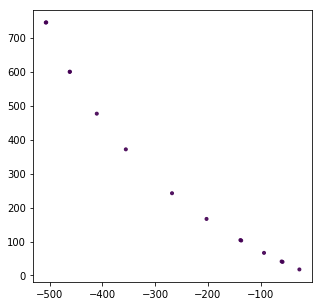

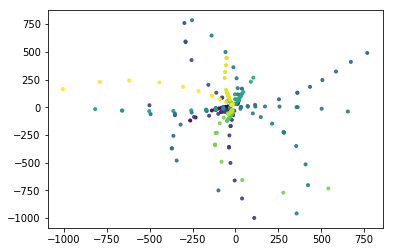

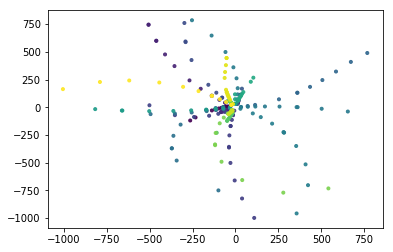

In [904]:
figure = plt.figure(figsize=(5,5))
plt.scatter(df1_test.x, df1_test.y, marker='.', alpha=0.9, c=df1_test.event_id)
plt.show()
plt.scatter(df1_train.x, df1_train.y, marker='.', alpha=0.9, c=df1_train.event_id)
plt.show()
plt.scatter(df1.x, df1.y, marker='.', alpha=0.9, c=df1.event_id)
plt.show()

In [896]:
df2 = df[df.particle_id == 418835796137607168]

In [898]:
df2.event_id.value_counts()

1061    16
1041    15
1037    15
1047    14
1011    14
1004    14
1040    14
1055    13
1089    13
1064    13
1051    12
1029    12
1074    12
1058    12
1045    11
1038    11
1036    11
1063    11
1070    11
1003    11
1000    10
1023    10
1017     9
1096     9
1005     9
1049     7
1092     7
1088     4
Name: event_id, dtype: int64

In [907]:
df2_test = df2[df2.event_id == 1023]
df2_train = df2[df2.event_id != 1023]

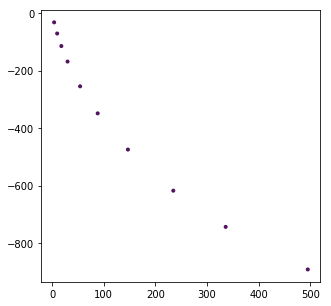

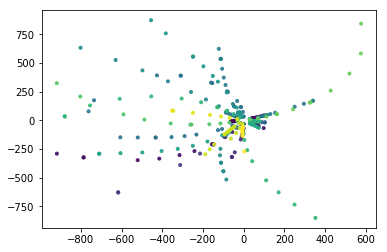

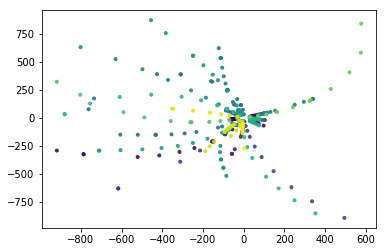

In [908]:
figure = plt.figure(figsize=(5,5))
plt.scatter(df2_test.x, df2_test.y, marker='.', alpha=0.9, c=df2_test.event_id)
plt.show()
plt.scatter(df2_train.x, df2_train.y, marker='.', alpha=0.9, c=df2_train.event_id)
plt.show()
plt.scatter(df2.x, df2.y, marker='.', alpha=0.9, c=df2.event_id)
plt.show()

In [909]:
df.particle_id.value_counts()

819655956815151104    367
418835796137607168    320
171140359252869120    248
Name: particle_id, dtype: int64

In [910]:
df3 = df[df.particle_id == 819655956815151104]

In [911]:
df3.event_id.value_counts()

1008    16
1038    16
1023    15
1000    14
1098    14
1082    13
1026    13
1050    13
1070    13
1073    13
1074    13
1095    12
1068    12
1014    12
1057    12
1063    12
1025    12
1003    12
1015    12
1004    11
1054    11
1048    11
1045    11
1085    11
1058    11
1060    10
1007    10
1029    10
1005     9
1094     7
1096     6
Name: event_id, dtype: int64

In [912]:
df3_test = df3[df3.event_id == 1095]
df3_train = df3[df3.event_id != 1095]

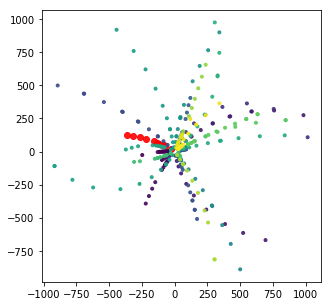

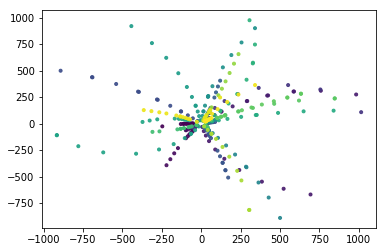

In [925]:
figure = plt.figure(figsize=(5,5))
plt.scatter(df3_test.x, df3_test.y, marker='o', alpha=0.9, c='red')
plt.scatter(df3_train.x, df3_train.y, marker='.', alpha=0.9, c=df3_train.event_id)
plt.show()
plt.scatter(df3.x, df3.y, marker='.', alpha=0.9, c=df3.event_id)
plt.show()

In [932]:
df_train = pd.DataFrame()
df_train = df_train.append([df1_train, df2_train, df3_train])
X_train = df_train[['x','y','z']].values

df_test = pd.DataFrame()
df_test = df_test.append([df1_test, df2_test, df3_test])
X_test = df_test[['x','y','z']].values

particle_list = list(set(df_train.particle_id.values))
nclass = list(range(len(particle_list)))
particle_dict = dict(zip(particle_list, nclass))
reverse_particle_dict = dict(zip(nclass, particle_list))
df_train['new_particle_id'] = df_train['particle_id'].map(lambda x: particle_dict[x])
y = y = np_utils.to_categorical(df_train['new_particle_id'].values)


In [933]:
df_train.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,vx,vy,vz,px,py,pz,q,nhits,event_id,new_particle_id
49,55,-137.6480,-29.06150,-1502.0,7,2,5,171140359252869120,-137.6370,-29.05750,...,-12.1927,11.2988,-308.526,-0.249725,-0.035172,-2.26913,-1.0,14.0,1000,0
1368,1487,-117.3900,-19.32850,-1298.0,7,4,3,171140359252869120,-117.3880,-19.33010,...,-12.1927,11.2988,-308.526,-0.249725,-0.035172,-2.26913,-1.0,14.0,1000,0
1400,1520,-117.7900,-19.51120,-1302.0,7,4,5,171140359252869120,-117.7920,-19.50960,...,-12.1927,11.2988,-308.526,-0.249725,-0.035172,-2.26913,-1.0,14.0,1000,0
3012,3242,-97.2391,-11.08850,-1102.5,7,6,1,171140359252869120,-97.2457,-11.10240,...,-12.1927,11.2988,-308.526,-0.249725,-0.035172,-2.26913,-1.0,14.0,1000,0
5074,5417,-82.6888,-5.73035,-962.5,7,8,1,171140359252869120,-82.6859,-5.70958,...,-12.1927,11.2988,-308.526,-0.249725,-0.035172,-2.26913,-1.0,14.0,1000,0


In [934]:
particle_dict

{171140359252869120: 0, 418835796137607168: 1, 819655956815151104: 2}

In [940]:
df_test

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,weight,vx,vy,vz,px,py,pz,q,nhits,event_id
878941,21992,-26.89050,17.7603,89.9057,8,2,143,171140359252869120,-26.89220,17.7567,...,0.000015,0.004813,0.010628,14.996000,-0.513409,0.327919,1.417130,1.0,14.0,1009
885065,28732,-58.82010,40.0087,180.5230,8,4,317,171140359252869120,-58.81840,40.0114,...,0.000013,0.004813,0.010628,14.996000,-0.513409,0.327919,1.417130,1.0,14.0,1009
885085,28757,-60.55170,41.2707,185.5190,8,4,318,171140359252869120,-60.55160,41.2710,...,0.000011,0.004813,0.010628,14.996000,-0.513409,0.327919,1.417130,1.0,14.0,1009
890939,35369,-93.89460,66.5842,282.9110,8,6,619,171140359252869120,-93.89410,66.5850,...,0.000009,0.004813,0.010628,14.996000,-0.513409,0.327919,1.417130,1.0,14.0,1009
895624,41072,-137.10700,102.8620,414.5170,8,8,1006,171140359252869120,-137.10700,102.8620,...,0.000008,0.004813,0.010628,14.996000,-0.513409,0.327919,1.417130,1.0,14.0,1009
895627,41076,-138.58900,104.1800,419.1380,8,8,1007,171140359252869120,-138.58900,104.1810,...,0.000007,0.004813,0.010628,14.996000,-0.513409,0.327919,1.417130,1.0,14.0,1009
920798,68957,-202.74300,166.4540,627.4000,13,2,676,171140359252869120,-202.74700,166.4510,...,0.000005,0.004813,0.010628,14.996000,-0.513409,0.327919,1.417130,1.0,14.0,1009
926071,75460,-268.10900,242.0770,860.6000,13,4,1058,171140359252869120,-268.13700,242.0540,...,0.000004,0.004813,0.010628,14.996000,-0.513409,0.327919,1.417130,1.0,14.0,1009
934627,87873,-355.61100,371.2770,1224.5000,14,2,148,171140359252869120,-355.92400,371.6240,...,0.000004,0.004813,0.010628,14.996000,-0.513409,0.327919,1.417130,1.0,14.0,1009
935684,89127,-410.63600,476.3300,1495.5000,14,4,146,171140359252869120,-410.59200,476.3130,...,0.000004,0.004813,0.010628,14.996000,-0.513409,0.327919,1.417130,1.0,14.0,1009


In [935]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [936]:
X_train.shape

(899, 3)

In [937]:
X_test.shape

(36, 3)

In [ ]:
# t - number of time steps
# n - length of input vector in each time step
# m - length of output vector (number of classes)
# i - number of training examples

# The minimum number of training examples is what you have up there:

# 4(nm+n2)

In [938]:
model = Sequential()
# model.add(BatchNormalization(input_shape=(1,2)))
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(1,3)))
# model.add(Bidirectional(LSTM(100, return_sequences=True)))
# model.add(Bidirectional(LSTM(2, return_sequences=True)))
model.add(Bidirectional(LSTM(100)))
# model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [939]:
%%time
model.fit(X_train.reshape(899, 1, 3), y,epochs=3000, shuffle=False, verbose=0)

CPU times: user 45min 7s, sys: 2min 11s, total: 47min 19s
Wall time: 34min 19s


In [945]:
p = model.predict(X_test.reshape(36,1,3))

In [946]:
p

array([[2.6651819e-06, 9.9999738e-01, 1.3797641e-14],
       [4.3276177e-05, 9.9995673e-01, 2.3269933e-14],
       [4.5011013e-05, 9.9995494e-01, 2.2368109e-14],
       [2.7528338e-05, 9.9997246e-01, 1.1313900e-14],
       [1.5694517e-05, 9.9998426e-01, 5.7836714e-15],
       [1.6103222e-05, 9.9998391e-01, 5.9264070e-15],
       [6.3526660e-04, 9.9936479e-01, 1.5881510e-14],
       [9.9117601e-01, 8.8240290e-03, 1.7411134e-13],
       [6.5290201e-01, 3.4709802e-01, 1.7043725e-13],
       [9.9556726e-01, 4.4327085e-03, 4.2532476e-15],
       [4.3681940e-08, 1.0000000e+00, 2.2687218e-17],
       [4.3994909e-08, 1.0000000e+00, 2.2398969e-17],
       [2.7531036e-04, 9.9972469e-01, 1.7191841e-16],
       [4.8435635e-05, 9.9995160e-01, 1.7136481e-16],
       [1.0000000e+00, 1.1231285e-25, 2.6218479e-21],
       [1.0000000e+00, 1.2575796e-26, 2.8941156e-22],
       [1.0000000e+00, 7.2757911e-26, 1.5930719e-22],
       [1.0000000e+00, 5.4065784e-26, 8.5742327e-23],
       [1.0000000e+00, 1.639

In [943]:
p = [np.argmax(p[i]) for i in range(len(X_test))]

In [944]:
l = [reverse_particle_dict[i] for i in p]
print(l)

[418835796137607168, 418835796137607168, 418835796137607168, 418835796137607168, 418835796137607168, 418835796137607168, 418835796137607168, 171140359252869120, 171140359252869120, 171140359252869120, 418835796137607168, 418835796137607168, 418835796137607168, 418835796137607168, 171140359252869120, 171140359252869120, 171140359252869120, 171140359252869120, 171140359252869120, 171140359252869120, 171140359252869120, 171140359252869120, 171140359252869120, 171140359252869120, 171140359252869120, 171140359252869120, 171140359252869120, 171140359252869120, 819655956815151104, 819655956815151104, 819655956815151104, 819655956815151104, 418835796137607168, 418835796137607168, 418835796137607168, 418835796137607168]


In [947]:
l

[418835796137607168,
 418835796137607168,
 418835796137607168,
 418835796137607168,
 418835796137607168,
 418835796137607168,
 418835796137607168,
 171140359252869120,
 171140359252869120,
 171140359252869120,
 418835796137607168,
 418835796137607168,
 418835796137607168,
 418835796137607168,
 171140359252869120,
 171140359252869120,
 171140359252869120,
 171140359252869120,
 171140359252869120,
 171140359252869120,
 171140359252869120,
 171140359252869120,
 171140359252869120,
 171140359252869120,
 171140359252869120,
 171140359252869120,
 171140359252869120,
 171140359252869120,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 819655956815151104,
 418835796137607168,
 418835796137607168,
 418835796137607168,
 418835796137607168]

In [950]:
df_test.particle_id.values

array([171140359252869120, 171140359252869120, 171140359252869120,
       171140359252869120, 171140359252869120, 171140359252869120,
       171140359252869120, 171140359252869120, 171140359252869120,
       171140359252869120, 171140359252869120, 171140359252869120,
       171140359252869120, 171140359252869120, 418835796137607168,
       418835796137607168, 418835796137607168, 418835796137607168,
       418835796137607168, 418835796137607168, 418835796137607168,
       418835796137607168, 418835796137607168, 418835796137607168,
       819655956815151104, 819655956815151104, 819655956815151104,
       819655956815151104, 819655956815151104, 819655956815151104,
       819655956815151104, 819655956815151104, 819655956815151104,
       819655956815151104, 819655956815151104, 819655956815151104])

In [4]:
# each particle_id is unique only to the event

In [5]:
hits.shape # hits for 100 events

(9009603, 24)

In [6]:
hits.event_id.value_counts()

1004    118333
1087    116845
1023    108088
1014    106026
1002    105685
1017    104523
1040    104329
1093    103558
1026    103173
1019    102851
1015    102494
1031    102468
1000    101172
1092    101103
1097    101097
1080    100835
1086    100424
1025    100182
1058     99329
1088     99225
1079     98859
1006     98801
1084     98352
1016     98146
1099     97859
1011     97811
1051     97762
1024     97395
1053     97287
1028     96852
         ...  
1070     84150
1096     83828
1054     83362
1068     82379
1041     82210
1048     81768
1032     81681
1052     81437
1071     81368
1098     81021
1076     80822
1090     80619
1078     80580
1091     79737
1057     78712
1047     77182
1063     77102
1035     77006
1077     76857
1061     76805
1033     76735
1056     76670
1067     75310
1020     74872
1001     74650
1044     74548
1082     73727
1018     73301
1039     69130
1062     58499
Name: event_id, Length: 100, dtype: int64

In [7]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,weight,vx,vy,vz,px,py,pz,q,nhits,event_id
0,2,-55.3361,0.635342,-1502.5,7,2,1,22525763437723648,-55.3385,0.630805,...,0.000010,-0.015802,0.006381,1.16279,-0.569670,-0.011187,-15.49600,1.0,10.0,1000
1,4,-96.1091,-8.241030,-1502.5,7,2,1,297237712845406208,-96.1229,-8.230360,...,0.000008,-0.000486,-0.015051,5.75865,-0.240629,0.012071,-3.70766,-1.0,11.0,1000
2,5,-62.6736,-9.371200,-1502.5,7,2,1,418835796137607168,-62.6594,-9.375040,...,0.000009,0.018365,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000
3,6,-57.0687,-8.177770,-1502.5,7,2,1,108087696726949888,-57.0856,-8.189710,...,0.000008,0.010383,-0.012398,3.92894,-0.392669,-0.075470,-10.47140,1.0,11.0,1000
4,7,-73.8723,-2.578900,-1502.5,7,2,1,968286151951515648,-73.8608,-2.575860,...,0.000007,-0.004178,0.004751,-5.12884,-0.453130,0.008006,-9.13374,-1.0,13.0,1000


In [8]:
hits['new_pid'] = hits.particle_id.astype('str') + '_' + hits.event_id.astype('str') 

In [9]:
hits.new_pid.nunique()

821402

In [10]:
new_pid_count = list(range(hits.new_pid.nunique()))
new_pid_list = list(set(hits.new_pid.values))
new_pid_dict = dict(zip(new_pid_list, new_pid_count))

In [11]:
hits['nid'] = hits['new_pid'].map(lambda x: new_pid_dict[x])

In [12]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,vy,vz,px,py,pz,q,nhits,event_id,new_pid,nid
0,2,-55.3361,0.635342,-1502.5,7,2,1,22525763437723648,-55.3385,0.630805,...,0.006381,1.16279,-0.569670,-0.011187,-15.49600,1.0,10.0,1000,22525763437723648_1000,813446
1,4,-96.1091,-8.241030,-1502.5,7,2,1,297237712845406208,-96.1229,-8.230360,...,-0.015051,5.75865,-0.240629,0.012071,-3.70766,-1.0,11.0,1000,297237712845406208_1000,667796
2,5,-62.6736,-9.371200,-1502.5,7,2,1,418835796137607168,-62.6594,-9.375040,...,-0.016865,4.19268,-0.268943,-0.058487,-6.58619,1.0,10.0,1000,418835796137607168_1000,668894
3,6,-57.0687,-8.177770,-1502.5,7,2,1,108087696726949888,-57.0856,-8.189710,...,-0.012398,3.92894,-0.392669,-0.075470,-10.47140,1.0,11.0,1000,108087696726949888_1000,145366
4,7,-73.8723,-2.578900,-1502.5,7,2,1,968286151951515648,-73.8608,-2.575860,...,0.004751,-5.12884,-0.453130,0.008006,-9.13374,-1.0,13.0,1000,968286151951515648_1000,580908


In [13]:
hits.sort_values(['nid', 'z'], inplace=True)
hits_train = hits[hits.event_id != 1078]
hits_test = hits[hits.event_id == 1078]

In [14]:
hits.head(20)

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,vy,vz,px,py,pz,q,nhits,event_id,new_pid,nid
5046256,21170,29.0663,14.653300,185.113,8,2,154,337771964917612544,29.0661,14.653600,...,0.014892,8.809940,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0
5052754,28336,63.4476,34.429700,399.828,8,4,403,337771964917612544,63.4482,34.428800,...,0.014892,8.809940,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0
5064234,41693,94.2532,54.702100,598.000,9,2,64,337771964917612544,94.2611,54.682000,...,0.014892,8.809940,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0
5064246,41708,94.8855,55.088900,602.000,9,2,65,337771964917612544,94.8719,55.108900,...,0.014892,8.809940,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0
5066768,44361,109.3790,65.570100,698.000,9,4,64,337771964917612544,109.3810,65.562200,...,0.014892,8.809940,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0
5066774,44369,109.9790,66.001600,702.000,9,4,65,337771964917612544,109.9790,66.004200,...,0.014892,8.809940,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0
5069242,46946,127.1180,79.017200,818.000,9,6,64,337771964917612544,127.1080,79.034200,...,0.014892,8.809940,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0
5069246,46953,127.6860,79.496900,822.000,9,6,65,337771964917612544,127.6890,79.492600,...,0.014892,8.809940,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0
5102312,87374,218.9870,165.024000,1498.500,14,4,103,337771964917612544,219.0630,165.109000,...,0.014892,8.809940,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0
5103298,88563,256.1940,207.485000,1798.500,14,6,103,337771964917612544,255.7830,207.162000,...,0.014892,8.809940,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0


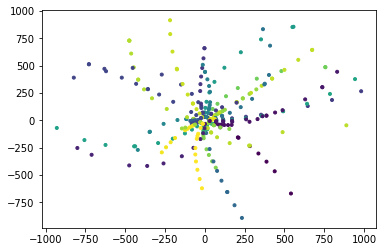

In [15]:
hits1 = hits[(hits.particle_id == 725081051835138048)]
plt.scatter(hits1.x, hits1.y, marker='.', c=hits1.event_id)

In [16]:
hits1.event_id.value_counts()

1065    15
1084    14
1025    14
1088    13
1045    13
1056    13
1060    13
1068    13
1024    13
1008    13
1066    12
1033    12
1036    12
1040    12
1019    12
1013    12
1099    12
1091    12
1090    12
1058    11
1081    11
1078    11
1096    11
1010    11
1048    10
1089    10
1021    10
1004    10
1097    10
1023    10
1082     6
1020     6
1009     4
1085     4
Name: event_id, dtype: int64

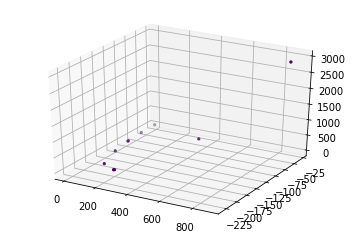

In [17]:
hits2 = hits1[(hits1.event_id == 1089)]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hits2.x, hits2.y, hits2.z, marker='.', c=hits2.event_id)

In [18]:
hits_train.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,particle_id,tx,ty,...,vy,vz,px,py,pz,q,nhits,event_id,new_pid,nid
5046256,21170,29.0663,14.6533,185.113,8,2,154,337771964917612544,29.0661,14.6536,...,0.014892,8.80994,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0
5052754,28336,63.4476,34.4297,399.828,8,4,403,337771964917612544,63.4482,34.4288,...,0.014892,8.80994,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0
5064234,41693,94.2532,54.7021,598.000,9,2,64,337771964917612544,94.2611,54.6820,...,0.014892,8.80994,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0
5064246,41708,94.8855,55.0889,602.000,9,2,65,337771964917612544,94.8719,55.1089,...,0.014892,8.80994,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0
5066768,44361,109.3790,65.5701,698.000,9,4,64,337771964917612544,109.3810,65.5622,...,0.014892,8.80994,0.342635,0.162206,2.05409,-1.0,14.0,1055,337771964917612544_1055,0


In [19]:
X_train = hits_train[['x', 'y','z']].values
X_test = hits_test[['x', 'y', 'z']].values

y = hits_train['nid'].values

In [20]:
len(set(hits_train['nid'].values))

814083

In [21]:
X_train.shape

(8929023, 3)

In [22]:
X_test.shape

(80580, 3)

In [23]:
8929023 + 80580

9009603

In [24]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [25]:
model = Sequential()
# model.add(BatchNormalization(input_shape=(1,2)))
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(1,3)))
# model.add(Bidirectional(LSTM(100, return_sequences=True)))
# model.add(Bidirectional(LSTM(2, return_sequences=True)))
model.add(Bidirectional(LSTM(100)))
# model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))

# model.add(Dense(100000, activation='relu'))

# model.add(Dropout(0.1))
model.add(Dense(81043, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [26]:
%%time
model.fit(X_train.reshape(8929023, 1, 3), y, batch_size=32, epochs=3000, shuffle=False, verbose=0)

ResourceExhaustedError: OOM when allocating tensor of shape [100000,81043] and type float
	 [[Node: training/Adam/zeros_16 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [100000,81043] values: [0 0 0]...>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'training/Adam/zeros_16', defined at:
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2856, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-bc691fa1f372>", line 1, in <module>
    get_ipython().run_cell_magic('time', '', 'model.fit(X_train.reshape(8929023, 1, 3), y, batch_size=32, epochs=3000, shuffle=False, verbose=0)')
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2131, in run_cell_magic
    result = fn(magic_arg_s, cell)
  File "<decorator-gen-62>", line 2, in time
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/IPython/core/magics/execution.py", line 1230, in time
    out = eval(code, glob, local_ns)
  File "<timed eval>", line 1, in <module>
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/keras/models.py", line 1002, in fit
    validation_steps=validation_steps)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/keras/engine/training.py", line 1682, in fit
    self._make_train_function()
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/keras/engine/training.py", line 992, in _make_train_function
    loss=self.total_loss)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/keras/optimizers.py", line 457, in get_updates
    ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/keras/optimizers.py", line 457, in <listcomp>
    ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 693, in zeros
    v = tf.zeros(shape=shape, dtype=tf_dtype, name=name)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1626, in zeros
    output = fill(shape, constant(zero, dtype=dtype), name=name)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2717, in fill
    "Fill", dims=dims, value=value, name=name)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor of shape [100000,81043] and type float
	 [[Node: training/Adam/zeros_16 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [100000,81043] values: [0 0 0]...>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]


In [27]:
p = model.predict(X_test.reshape(80580,1,3))

FailedPreconditionError: Attempting to use uninitialized value dense_1/kernel
	 [[Node: dense_1/kernel/read = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_1/kernel)]]
	 [[Node: dense_3/Softmax/_157 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_875_dense_3/Softmax", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'dense_1/kernel/read', defined at:
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-b9059d8a40ed>", line 8, in <module>
    model.add(Dense(32, activation='relu'))
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/keras/models.py", line 522, in add
    output_tensor = layer(self.outputs[0])
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/keras/engine/topology.py", line 592, in __call__
    self.build(input_shapes[0])
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/keras/layers/core.py", line 864, in build
    constraint=self.kernel_constraint)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/keras/engine/topology.py", line 416, in add_weight
    constraint=constraint)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 396, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 235, in __init__
    constraint=constraint)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 397, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 142, in identity
    return gen_array_ops.identity(input, name=name)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3187, in identity
    "Identity", input=input, name=name)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/home/watts/anaconda3/envs/tmlfg/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value dense_1/kernel
	 [[Node: dense_1/kernel/read = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_1/kernel)]]
	 [[Node: dense_3/Softmax/_157 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_875_dense_3/Softmax", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
